# Project 1 Machine Learning Terapan - Predictive Analysis: Forecasting and Comparing Maize, Rice, Green Coffee, Cocoa Beans and Palm Oil Production in ASEAN Using LSTM

- **Nama:** Fadhilah Nurrahmayanti
- **Email:** a117xbm150@devacademy.id
- **ID Dicoding:** dilaafn


## Project Domain

Produksi pangan merupakan sektor vital bagi negara-negara ASEAN, mengingat sebagian besar wilayahnya masih mengandalkan pertanian sebagai sumber utama pangan dan pendapatan. Dengan meningkatnya populasi dan perubahan iklim yang tidak menentu, memprediksi produksi pangan menjadi kebutuhan strategis. Data historis produksi komoditas seperti jagung, beras, kopi, coklat, dan minyak sawit dapat dimanfaatkan untuk membuat prediksi produksi di masa depan.

Meskipun sangat penting, tren produksi di negara-negara ini sering kali sangat fluktuatif, dipengaruhi oleh variabilitas musiman dan dinamika global. Hal ini menyulitkan dalam memproyeksikan tingkat pasokan di masa depan secara akurat, yang pada akhirnya menjadi tantangan dalam ketahanan pangan, strategi perdagangan, dan perencanaan kebijakan jangka panjang.

Dengan tersedianya data melalui [World Food Production Dataset (Kaggle)](https://www.kaggle.com/datasets/rafsunahmad/world-food-production/data), memungkinkan penggunaan **Data-driven Forecasting Models** seperti neural network **Long Short-Term Memory (LSTM)** untuk memproyeksikan tren produksi hingga tahun 2030 dan membandingkan hasil per negara dari waktu ke waktu.

**Mengapa Masalah Ini Perlu diselesaikan**

1. **Perencanaan Pertanian Jangka Panjang**
   Pemerintah dan perencana pertanian membutuhkan prediksi yang andal untuk menyusun strategi ketahanan pangan dan mengoptimalkan infrastruktur produksi.

2. **Tolok Ukur Strategis Antar Negara ASEAN**
   Peramalan produksi masa depan membantu menentukan apakah Indonesia tetap dominan dalam produksi beras.

3. **Analisis Tren Produksi Global**
   Model LSTM univariat memungkinkan analisis tren setiap komoditas secara independen, memberikan wawasan terhadap stagnasi pertumbuhan atau potensi peningkatan hasil.

**Bagaimana Masalah Ini Akan Diselesaikan**

Solusi dilakukan dengan membangun **model LSTM univariat** yang hanya menggunakan **jumlah produksi tahunan** sebagai input, tanpa variabel lingkungan atau ekonomi tambahan. Pendekatan ini murni berbasis data historis dari [World Food Production Dataset (Kaggle)](https://www.kaggle.com/datasets/rafsunahmad/world-food-production/data)

**Langkah Implementasi:**

1. **Pra-pemrosesan data deret waktu** (1961–2021) untuk tiap komoditas (jagung, beras, kopi, coklat, dan minyak sawit) dan negara (Indonesia, Vietnam, Thailand, Filipina dan Malaysia).
2. **Melatih model LSTM terpisah** untuk tiap komoditas dan negara.
3. **Memprediksi produksi tahun 2022–2030.**
4. **Visualisasi dan perbandingan** proyeksi antar negara dan komoditas.

## Business Understanding

### Problem Statements

**Masalah 1:**

Tren historis produksi pertanian di negara-negara ASEAN sangat fluktuatif. Tanpa peramalan yang akurat, pemerintah dan pemangku kepentingan di sektor pertanian kesulitan dalam merumuskan strategi pangan dan perdagangan jangka panjang.

**Masalah 2:**

Belum tersedia standar perbandingan proyeksi produksi yang membandingkan posisi Indonesia dengan negara produsen utama ASEAN lainnya, seperti Vietnam, Thailand, dan Malaysia, untuk komoditas strategis seperti beras, kopi, dan minyak sawit.

**Masalah 3:**

Teknik peramalan tradisional (misalnya statistik dasar atau regresi linier) sering kali gagal menangkap pola musiman dan non-linier dalam data deret waktu produksi pertanian jangka panjang.

### Goals

**Tujuan 1 (untuk Masalah 1):**

Mengembangkan model **LSTM univariat yang akurat** untuk meramalkan produksi tahunan beras, kopi, dan minyak sawit dari tahun 2022 hingga 2030 menggunakan data historis (1961–2021) per negara dan komoditas.

**Tujuan 2 (untuk Masalah 2):**

Membandingkan hasil proyeksi produksi antara Indonesia, Vietnam, Thailand, dan Malaysia untuk masing-masing komoditas, guna mengevaluasi posisi daya saing Indonesia secara kuantitatif.

**Tujuan 3 (untuk Masalah 3):**

Menggunakan LSTM untuk memodelkan tren historis produksi yang non-linier dan musiman, sehingga meningkatkan akurasi peramalan dibandingkan model konvensional seperti moving average atau regresi linier.

### Solution Statements

**Solusi 1:**

Membangun **model LSTM univariat secara terpisah** untuk setiap kombinasi komoditas dan negara (total 12 model) menggunakan data produksi tahunan dari [World Food Production Dataset (Kaggle)](https://www.kaggle.com/datasets/rafsunahmad/world-food-production/data).

Untuk mengukur performa peramalan:

* **RMSE (Root Mean Squared Error)** – mengukur seberapa besar deviasi prediksi terhadap nilai aktual.
* **MAE (Mean Absolute Error)** – mengukur rata-rata selisih absolut antara nilai prediksi dan nilai aktual.

**Solusi 2:**

Membandingkan dan memvisualisasikan hasil prediksi total produksi per kombinasi komoditas dan negara, sehingga para pemangku kepentingan dapat menilai posisi daya saing Indonesia di kawasan ASEAN.

## Data Understanding

Dataset yang digunakan berisi data produksi komoditas pangan dari berbagai negara ASEAN. File data bernama Data.csv, dan berisi 11.912 baris dengan 24 kolom.

Dataset: [World Food Production Dataset (Kaggle)](https://www.kaggle.com/datasets/rafsunahmad/world-food-production/data) (1961–2021)

### Importing Required Libraries

Memuat semua pustaka yang diperlukan dalam analisis data dan pengembangan model. Library seperti pandas dan numpy digunakan untuk manipulasi data, matplotlib dan seaborn untuk visualisasi, sklearn untuk preprocessing dan evaluasi model, serta TensorFlow dan Keras untuk membangun serta melatih model neural network.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

**Insight:**

* Semua library utama telah diimpor untuk mendukung proses analisis dan modeling secara menyeluruh
* Kehadiran MinMaxScaler mengindikasikan adanya tahap normalisasi data
* Penggunaan LSTM menunjukkan pemodelan berbasis data deret waktu atau sekuensial
* EarlyStopping disiapkan untuk mencegah overfitting selama pelatihan model

### Dataset Source and Overview

Membaca dan Menampilkan Dataset yang akan digunakan

In [ ]:
df = pd.read_csv('Data.csv')
df.head()

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)
0,Afghanistan,1961,700000.0,319000.0,7467702.0,2279000.0,1873812.0,56315.0,3270871.0,12000.0,...,10100.0,232910.0,1131882.0,225000.0,870970.0,835368.0,5600.0,3139079.0,63439.0,15100.0
1,Afghanistan,1962,700000.0,319000.0,7420515.0,2279000.0,2044797.0,61519.0,3562524.0,12800.0,...,10100.0,259412.0,1111006.0,225000.0,883512.0,867170.0,6000.0,3181580.0,65118.0,15100.0
2,Afghanistan,1963,713000.0,319000.0,8479074.0,1947000.0,2096077.0,63596.0,3409916.0,12800.0,...,10100.0,251529.0,1145004.0,225000.0,996674.0,922621.0,6160.0,3304256.0,61760.0,15100.0
3,Afghanistan,1964,720000.0,380000.0,9113779.0,2230000.0,2388264.0,66604.0,3229336.0,12800.0,...,12400.0,247556.0,1160831.0,265000.0,1162048.0,1190061.0,6400.0,3392527.0,62759.0,18400.0
4,Afghanistan,1965,720000.0,380000.0,10067913.0,2282000.0,2559608.0,72418.0,3169104.0,13200.0,...,13700.0,266947.0,1138860.0,287000.0,1075084.0,874245.0,6800.0,3450849.0,66269.0,20400.0


**Insight:**

* Dataset berhasil dimuat dengan total 11912 baris dan 24 kolom
* Data berisi informasi produksi berbagai komoditas pertanian dari tahun ke tahun di berbagai negara
* Format data tabular memudahkan proses eksplorasi, visualisasi, dan preprocessing
* Tidak terdapat error saat pemanggilan file yang menunjukkan path file dan formatnya valid
* Struktur data awal masih mengandung beberapa spasi dan format kolom yang tidak seragam sehingga memerlukan tahap preprocessing lanjutan
* Karena data mencakup banyak komoditas dari banyak negara maka perlu dilakukan filtering untuk fokus pada negara ASEAN dan lima komoditas utama

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11912 entries, 0 to 11911
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Entity                               11912 non-null  object 
 1   Year                                 11912 non-null  int64  
 2   Maize Production (tonnes)            11912 non-null  float64
 3   Rice  Production ( tonnes)           11912 non-null  float64
 4   Yams  Production (tonnes)            11912 non-null  float64
 5   Wheat Production (tonnes)            11912 non-null  float64
 6   Tomatoes Production (tonnes)         11912 non-null  float64
 7   Tea  Production ( tonnes )           11912 non-null  float64
 8   Sweet potatoes  Production (tonnes)  11912 non-null  float64
 9   Sunflower seed  Production (tonnes)  11912 non-null  float64
 10  Sugar cane Production (tonnes)       11912 non-null  float64
 11  Soybeans  Production (tonnes

**Insight:**

* Dataset terdiri dari 11912 baris dan 24 kolom
* Terdapat 22 variabel numerik bertipe float64, 1 variabel bertipe integer (Year), dan 1 variabel bertipe objek (Entity)
* Tidak terdapat nilai null di seluruh kolom, yang berarti data bersih dalam hal kelengkapan
* Sebagian besar variabel adalah hasil produksi komoditas pertanian dengan satuan ton
* Struktur data siap untuk dilakukan eksplorasi lebih lanjut dan preprocessing

### Variable Descriptions

Proses ini bertujuan untuk menampilkan informasi umum mengenai struktur dataset, termasuk jumlah baris dan kolom, dan menampilkan isi dari kolom. Ini merupakan langkah awal dalam Exploratory Data Analysis (EDA) untuk memahami bentuk dan karakteristik data yang akan dianalisis.

In [ ]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
print("\nAvailable columns:")
print(df.columns.tolist())

Dataset contains 11912 rows and 24 columns.

Available columns:
['Entity', 'Year', 'Maize Production (tonnes)', 'Rice  Production ( tonnes)', 'Yams  Production (tonnes)', 'Wheat Production (tonnes)', 'Tomatoes Production (tonnes)', 'Tea  Production ( tonnes )', 'Sweet potatoes  Production (tonnes)', 'Sunflower seed  Production (tonnes)', 'Sugar cane Production (tonnes)', 'Soybeans  Production (tonnes)', 'Rye  Production (tonnes)', 'Potatoes  Production (tonnes)', 'Oranges  Production (tonnes)', 'Peas, dry Production ( tonnes)', 'Palm oil  Production (tonnes)', 'Grapes  Production (tonnes)', 'Coffee, green Production ( tonnes)', 'Cocoa beans Production (tonnes)', 'Meat, chicken  Production (tonnes)', 'Bananas  Production ( tonnes)', 'Avocados Production (tonnes)', 'Apples Production (tonnes)']


**Insight:**

* Dataset terdiri dari 11.912 baris dan 24 kolom
* Terdapat 1 kolom kategori (Entity), 1 kolom waktu (Year), dan 22 kolom numerik yang merepresentasikan jumlah produksi berbagai komoditas pertanian.
* Nama-nama kolom menunjukkan cakupan data yang luas, termasuk produk tanaman pangan, buah-buahan, hingga hasil perkebunan. Nama-nama kolom dalam dataset adalah sebagai berikut:
  * Entity
  * Year
  * Maize Production (tonnes)
  * Rice Production (tonnes)
  * Yams Production (tonnes)
  * Wheat Production (tonnes)
  * Tomatoes Production (tonnes)
  * Tea Production (tonnes)
  * Sweet potatoes Production (tonnes)
  * Sunflower seed Production (tonnes)
  * Sugar cane Production (tonnes)
  * Soybeans Production (tonnes)
  * Rye Production (tonnes)
  * Potatoes Production (tonnes)
  * Oranges Production (tonnes)
  * Peas, dry Production (tonnes)
  * Palm oil Production (tonnes)
  * Grapes Production (tonnes)
  * Coffee, green Production (tonnes)
  * Cocoa beans Production (tonnes)
  * Meat, chicken Production (tonnes)
  * Bananas Production (tonnes)
  * Avocados Production (tonnes)
  * Apples Production (tonnes)

### Missing Value and Duplicate Data Check

Memastikan kualitas data sebelum masuk ke tahap analisis atau pemodelan, karena nilai kosong maupun data duplikat dapat mengganggu hasil dan akurasi model.

In [ ]:
df.isnull().sum()

,0
Entity,0
Year,0
Maize Production (tonnes),0
Rice Production ( tonnes),0
Yams Production (tonnes),0
Wheat Production (tonnes),0
Tomatoes Production (tonnes),0
Tea Production ( tonnes ),0
Sweet potatoes Production (tonnes),0
Sunflower seed Production (tonnes),0


**Insight:**

* Seluruh kolom dalam dataset tidak memiliki nilai kosong
* Data dapat langsung digunakan tanpa perlu melakukan imputasi atau penghapusan entri
* Kualitas data dari sisi kelengkapan sangat baik
* Proses pembersihan data awal tidak diperlukan pada aspek missing values

In [ ]:
print('Total Duplikasi Data:', df.duplicated().sum())

Total Duplikasi Data: 0


**Insight:**

* Tidak terdapat data yang duplikat dalam dataset
* Dataset bersih dan siap untuk tahap preprocessing dan analisis lebih lanjut

### ASEAN Country and Commodity Selection

Memfokuskan analisis pada lima negara ASEAN, yaitu Indonesia, Vietnam, Thailand, Filipina, dan Malaysia, serta pada komoditas tertentu yang relevan secara ekonomi dan produksi, yaitu jagung, beras, kopi, kakao, dan minyak
 sawit.

In [ ]:
target_countries = ['Indonesia', 'Vietnam', 'Thailand', 'Philippines', 'Malaysia']

selected_columns = [
    'Entity', 'Year',
    'Maize Production (tonnes)',
    'Rice  Production ( tonnes)',
    'Coffee, green Production ( tonnes)',
    'Cocoa beans Production (tonnes)',
    'Palm oil  Production (tonnes)'
]

df_filtered = df[df['Entity'].isin(target_countries)][selected_columns].copy()
df_filtered.head()

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),Palm oil Production (tonnes)
5062,Indonesia,1961,2283100.0,7965911.0,47.05,20000.0,21602.0
5063,Indonesia,1962,3242900.0,8694623.0,48.30,28000.0,23002.0
5064,Indonesia,1963,2357800.0,8735168.0,46.38,32000.0,24802.0
5065,Indonesia,1964,3768600.0,9371189.0,48.41,35000.0,25002.0
5066,Indonesia,1965,2364500.0,9655017.0,48.48,35000.0,27202.0


**Insight:**

* Dataset berhasil difilter menjadi 305 baris yang hanya mencakup negara dan komoditas target
* Komoditas yang dipilih memiliki nilai strategis tinggi di kawasan ASEAN, terutama dalam sektor pertanian dan ekspor
* Variabel produksi yang dipilih mewakili kategori tanaman pangan, minuman, dan industri
* Data kini lebih fokus dan manageable untuk dilakukan eksplorasi dan visualisasi mendalam


### Feature Renaming for Simplicity

Nama kolom pada dataset mengandung format yang tidak konsisten, seperti spasi berlebih dan anotasi satuan (contoh: " (tonnes)" atau " ( tonnes)"), yang perlu dibersihkan untuk menghindari kesalahan kunci dalam pemrosesan selanjutnya.

In [ ]:
df_filtered.columns = df_filtered.columns.str.replace(' \(tonnes\)', '', regex=True)
df_filtered.columns = df_filtered.columns.str.replace(' \( tonnes\)', '', regex=True)
df_filtered.columns = df_filtered.columns.str.replace('Coffee, green Production', 'Coffee green Production', regex=True)
df_filtered.columns = df_filtered.columns.str.replace('Palm oil  Production', 'Palm oil Production', regex=True)
df_filtered.columns = df_filtered.columns.str.replace('Cocoa beans Production', 'Cocoa beans Production', regex=True)
df_filtered.columns = df_filtered.columns.str.replace('Rice  Production', 'Rice Production', regex=True)
df_filtered.columns = df_filtered.columns.str.replace('Maize Production', 'Maize Production', regex=True)
df_filtered.head()

,Entity,Year,Maize Production,Rice Production,Coffee green Production,Cocoa beans Production,Palm oil Production
5062,Indonesia,1961,2283100.0,7965911.0,47.05,20000.0,21602.0
5063,Indonesia,1962,3242900.0,8694623.0,48.30,28000.0,23002.0
5064,Indonesia,1963,2357800.0,8735168.0,46.38,32000.0,24802.0
5065,Indonesia,1964,3768600.0,9371189.0,48.41,35000.0,25002.0
5066,Indonesia,1965,2364500.0,9655017.0,48.48,35000.0,27202.0


**Insight:**

* Seluruh kolom produksi kini memiliki nama yang lebih ringkas dan konsisten
* Penghapusan satuan (tonnes) bertujuan agar nama kolom lebih mudah digunakan dalam pemanggilan kode dan visualisasi
* Kesalahan spasi ganda dan format tidak konsisten seperti pada "Rice  Production" dan "Palm oil  Production" telah dibersihkan
* Penyesuaian nama seperti “Coffee green Production” memudahkan identifikasi saat pengolahan data lebih lanjut


## Data Preparation

#### Checking Outliers

Proses ini menggunakan visualisasi boxplot untuk mengidentifikasi outlier pada lima komoditas utama. Boxplot membantu melihat sebaran data, median, kuartil, dan titik-titik ekstrem yang dianggap sebagai outlier berdasarkan rentang interkuartil.

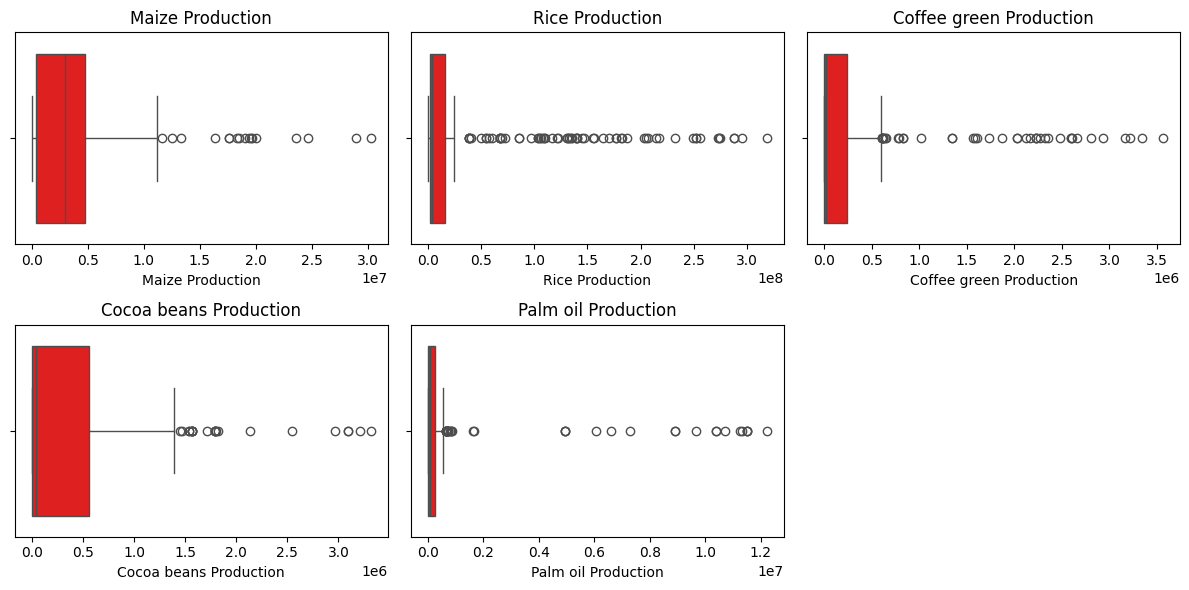

In [ ]:
commodities = ['Maize Production', 'Rice Production', 'Coffee green Production',
               'Cocoa beans Production', 'Palm oil Production']

plt.figure(figsize=(12, 6))

for i, commodity in enumerate(commodities):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df_filtered[commodity], color='red')
    plt.title(commodity)

plt.tight_layout()
plt.show()

**Insight:**

* Seluruh komoditas menunjukkan keberadaan outlier yang cukup banyak di sisi nilai produksi tinggi
* Rice production memiliki outlier paling ekstrem, mencerminkan beberapa tahun atau negara dengan lonjakan produksi besar
* Coffee, cocoa beans, dan palm oil memiliki distribusi yang sangat condong ke kiri dengan banyak nilai ekstrem di atas kuartil ketiga
* Rentang antar kuartil sempit menunjukkan sebagian besar data terpusat di nilai rendah dengan penyebaran terbatas
* Kehadiran outlier perlu diperhatikan dalam proses modeling untuk menghindari bias terhadap nilai ekstrim


#### Handling Outliers

Transformasi logaritmik dilakukan untuk mengatasi distribusi data yang condong dan mengurangi pengaruh nilai ekstrem atau outlier. Metode log1p digunakan agar nilai nol tetap dapat ditransformasikan tanpa error. Transformasi ini bertujuan untuk menstabilkan varians dan meningkatkan performa model yang sensitif terhadap skala data.

In [ ]:
df_transformed = df_filtered.copy()

for col in commodities:
    df_transformed[col] = np.log1p(df_transformed[col])

df_transformed.head()

,Entity,Year,Maize Production,Rice Production,Coffee green Production,Cocoa beans Production,Palm oil Production
5062,Indonesia,1961,14.641045,15.890682,3.872242,9.903538,9.980587
5063,Indonesia,1962,14.991979,15.978215,3.897924,10.239996,10.043380
5064,Indonesia,1963,14.673240,15.982868,3.858200,10.373522,10.118720
5065,Indonesia,1964,15.142214,16.053151,3.900153,10.463132,10.126751
5066,Indonesia,1965,14.676078,16.082988,3.901569,10.463132,10.211083


**Insight:**

* Distribusi data menjadi lebih normal dan seimbang setelah transformasi
* Outlier yang sebelumnya ekstrem menjadi lebih terkompresi dan tidak terlalu dominan
* Perbedaan skala antar komoditas menjadi lebih seragam, mendukung proses pembelajaran model
* Data hasil transformasi lebih siap untuk digunakan dalam analisis statistik dan modeling prediktif


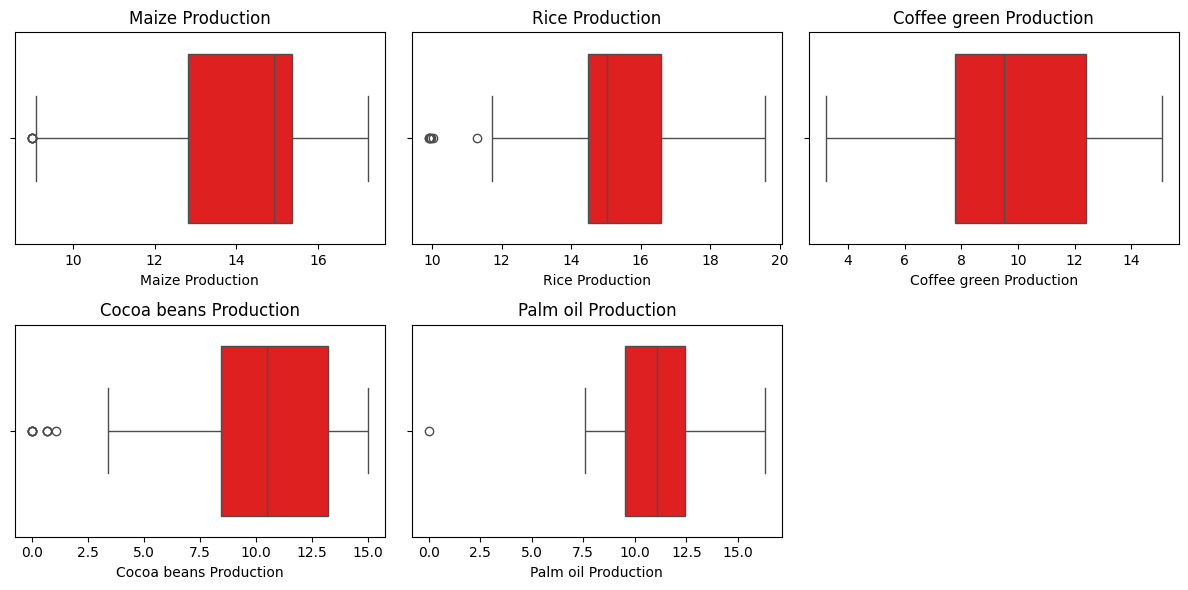

In [ ]:
plt.figure(figsize=(12, 6))

for i, commodity in enumerate(commodities):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df_transformed[commodity], color='red')
    plt.title(commodity)

plt.tight_layout()

**Insight:**

Memastikan distribusi nilai lebih seimbang dan meminimalkan pengaruh ekstrem terhadap proses analisis dan pemodelan.

* Sebagian besar outlier ekstrem yang sebelumnya muncul telah berhasil ditekan dan distribusi menjadi lebih simetris
* Rentang antar kuartil menjadi lebih luas, menunjukkan penyebaran data yang lebih stabil
* Beberapa outlier kecil masih muncul, terutama pada cocoa beans dan palm oil, namun tidak lagi mendominasi distribusi
* Transformasi berhasil mengurangi skewness, membuat data lebih siap untuk dimodelkan dengan algoritma yang sensitif terhadap skala dan distribusi


#### Data Normalization

Normalisasi data dilakukan untuk menskalakan nilai fitur ke dalam rentang 0 hingga 1 menggunakan metode **MinMaxScaler** agar setiap fitur memiliki skala yang seimbang.

In [ ]:
df_normalized = df_transformed.copy()

scalers = {}

for col in commodities:
    scaler = MinMaxScaler()
    df_normalized[col] = scaler.fit_transform(df_normalized[[col]])
    scalers[col] = scaler

df_normalized.head()

,Entity,Year,Maize Production,Rice Production,Coffee green Production,Cocoa beans Production,Palm oil Production
5062,Indonesia,1961,0.686313,0.618756,0.055055,0.659623,0.611591
5063,Indonesia,1962,0.728914,0.627802,0.057219,0.682033,0.615439
5064,Indonesia,1963,0.690222,0.628283,0.053872,0.690926,0.620056
5065,Indonesia,1964,0.747151,0.635546,0.057407,0.696895,0.620548
5066,Indonesia,1965,0.690566,0.638630,0.057526,0.696895,0.625716


**Insight:**

* Semua komoditas telah berhasil dinormalisasi ke dalam rentang 0 sampai 1
* Nilai minimum dan maksimum dari masing-masing fitur telah disesuaikan berdasarkan distribusi logaritmik sebelumnya
* Perbandingan antar fitur menjadi lebih seragam, memperbaiki performa model yang sensitif terhadap skala data seperti neural network
* Proses ini juga membantu mempercepat konvergensi model saat pelatihan dan mengurangi risiko ketidakseimbangan pembelajaran


#### Data Splitting

Membagi data masing-masing negara dan komoditas ke dalam subset pelatihan (train) dan pengujian (test) berdasarkan proporsi 80% untuk pelatihan dan 20% untuk pengujian. Data dibagi secara individual untuk setiap kombinasi negara dan komoditas, agar model nantinya dapat belajar dari pola spesifik masing-masing.

In [ ]:
target_countries = ['Indonesia', 'Vietnam', 'Thailand', 'Philippines', 'Malaysia']
commodities = ['Maize Production', 'Rice Production', 'Coffee green Production',
               'Cocoa beans Production', 'Palm oil Production']

df_splits = {}

for country in target_countries:
    for commodity in commodities:
        key = f"{country} - {commodity}"

        df_sub = df_normalized[
            df_normalized['Entity'] == country][[
                    'Year', commodity]].dropna().reset_index(drop=True)
        if len(df_sub) > 10:
            split_idx = int(len(df_sub) * 0.8)
            train =df_sub[commodity].iloc[:split_idx].values
            test = df_sub[commodity].iloc[split_idx:].values
            test_years = df_sub['Year'].iloc[split_idx + 5:].values

            df_splits[key] = {
                'train': train,
                'test': test,
                'years_test': test_years,
                'total_years': len(df_sub)
            }

summary = pd.DataFrame([
    {
        'Country – Commodity': key,
        'Train Length': len(val['train']),
        'Test Length': len(val['test']),
        'Total Years': val['total_years']
    }
    for key, val in df_splits.items()
])

summary

,Country – Commodity,Train Length,Test Length,Total Years
0,Indonesia - Maize Production,48,13,61
1,Indonesia - Rice Production,48,13,61
2,Indonesia - Coffee green Production,48,13,61
3,Indonesia - Cocoa beans Production,48,13,61
4,Indonesia - Palm oil Production,48,13,61
5,Vietnam - Maize Production,48,13,61
6,Vietnam - Rice Production,48,13,61
7,Vietnam - Coffee green Production,48,13,61
8,Vietnam - Cocoa beans Production,48,13,61
9,Vietnam - Palm oil Production,48,13,61


**Insight:**

* Setiap kombinasi negara dan komoditas memiliki total 61 tahun data, dengan 48 tahun untuk pelatihan dan 13 tahun untuk pengujian
* Struktur data siap digunakan untuk pelatihan model deret waktu seperti LSTM, karena urutan waktu dipertahankan
* Pembagian data yang konsisten memastikan evaluasi model dapat dilakukan secara adil dan seragam antar kombinasi
* Seluruh kombinasi negara dan komoditas memenuhi syarat minimum data dan berhasil dipisahkan tanpa error


#### Data Reshape

Data deret waktu diubah menjadi format sekuensial menggunakan pendekatan sliding window dengan parameter look_back = 5, yang berarti model akan mempelajari lima tahun sebelumnya untuk memprediksi satu tahun berikutnya.

In [ ]:
look_back = 5

def create_sequences(series, look_back=5):
    X, y = [], []
    for i in range(len(series) - look_back):
        X.append(series[i:i+look_back])
        y.append(series[i+look_back])
    return np.array(X), np.array(y)

reshaped_data = {}

for key, split in df_splits.items():
    train = split['train']
    test = split['test']

    X_train, y_train = create_sequences(train, look_back)
    X_test, y_test = create_sequences(test, look_back)

    X_train = X_train.reshape((X_train.shape[0], look_back, 1))
    X_test = X_test.reshape((X_test.shape[0], look_back, 1))

    reshaped_data[key] = {
        'X_train': X_train,
        'y_train': y_train,
        'X_test': X_test,
        'y_test': y_test,
        'years_test': split['years_test']
    }

print("Available pairs in reshaped_data:")

for key in reshaped_data.keys():
    print("-", key)

Available pairs in reshaped_data:
- Indonesia - Maize Production
- Indonesia - Rice Production
- Indonesia - Coffee green Production
- Indonesia - Cocoa beans Production
- Indonesia - Palm oil Production
- Vietnam - Maize Production
- Vietnam - Rice Production
- Vietnam - Coffee green Production
- Vietnam - Cocoa beans Production
- Vietnam - Palm oil Production
- Thailand - Maize Production
- Thailand - Rice Production
- Thailand - Coffee green Production
- Thailand - Cocoa beans Production
- Thailand - Palm oil Production
- Philippines - Maize Production
- Philippines - Rice Production
- Philippines - Coffee green Production
- Philippines - Cocoa beans Production
- Philippines - Palm oil Production
- Malaysia - Maize Production
- Malaysia - Rice Production
- Malaysia - Coffee green Production
- Malaysia - Cocoa beans Production
- Malaysia - Palm oil Production


**Insight:**

* Setiap kombinasi negara dan komoditas kini memiliki struktur data siap pakai untuk pelatihan model LSTM
* Total 25 pasangan negara-komoditas berhasil diubah menjadi bentuk sekuensial
* Ukuran input model menjadi konsisten, memungkinkan pelatihan dan evaluasi yang efisien
* Transformasi ini mempertahankan hubungan temporal antar tahun, yang sangat penting untuk model prediktif berbasis waktu


#### Data Structure Verification

Memastikan data hasil reshape memiliki dimensi yang sesuai untuk digunakan dalam model LSTM. Setiap sampel pelatihan dan pengujian direpresentasikan sebagai sekuens 5 tahun sebelumnya (look-back) dan target satu tahun ke depan.

In [ ]:
key = 'Indonesia - Rice Production'

print(f"Data for {key}:\n")
print("X_train shape:", reshaped_data[key]['X_train'].shape)
print("y_train shape:", reshaped_data[key]['y_train'].shape)
print("X_test shape:", reshaped_data[key]['X_test'].shape)
print("y_test shape:", reshaped_data[key]['y_test'].shape)
print("years_test shape:", reshaped_data[key]['years_test'].shape)

Data for Indonesia - Rice Production:

X_train shape: (43, 5, 1)
y_train shape: (43,)
X_test shape: (8, 5, 1)
y_test shape: (8,)
years_test shape: (8,)


**Insight:**

* Untuk kombinasi Indonesia - Rice Production, data pelatihan terdiri dari 43 sampel sekuens dengan 5 langkah waktu dan 1 fitur per langkah
* Data pengujian terdiri dari 8 sampel sekuens, selaras dengan ukuran years_test sebanyak 8 tahun
* Struktur data [samples, timesteps, features] telah berhasil dibentuk dan siap digunakan dalam model LSTM
* Validasi bentuk data penting untuk mencegah error saat pelatihan model dan memastikan data memenuhi kebutuhan input jaringan neural


## Model Development

Tujuan utama dari proyek ini adalah membangun model peramalan deret waktu yang mampu memprediksi produksi pertanian di masa depan secara akurat menggunakan data historis tahunan. Untuk itu, arsitektur **Long Short-Term Memory (LSTM)** dipilih karena kemampuannya dalam mempelajari pola dependensi temporal yang kompleks dalam data berurutan.

Metode statistik tradisional (seperti ARIMA atau eksponensial smoothing) sering kali kesulitan dalam menangani:
* Tren yang bersifat non-linear
* Dependensi jangka panjang
* Volatilitas dalam data produksi pertanian

LSTM, yang merupakan turunan dari Recurrent Neural Networks (RNN), sangat cocok untuk peramalan deret waktu karena menggunakan *memory cells* yang mampu menyimpan informasi sepanjang urutan data yang lebih panjang [1].

Untuk setiap pasangan negara–komoditas, dibangun satu model **LSTM univariat** yang dilatih menggunakan jendela data produksi tahunan selama 5 tahun (setelah transformasi log dan normalisasi).

* **Bentuk input**: (jumlah sampel, 5, 1)
* **Arsitektur Layer**:
  * LSTM(units=50, activation='relu')
  * Dense(units=1)
* **Fungsi Loss**: Mean Squared Error (MSE)  
* **Optimizer**: Adam  
* **EarlyStopping**: Diaktifkan dengan patience=10 dan min_delta=0.001 untuk mencegah overfitting

### Train LSTM Model

In [ ]:
def train_lstm_model(X_train, y_train, X_test, y_test, look_back=5, epochs=100):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    early_stop = EarlyStopping(
        monitor='loss',
        patience=10,
        restore_best_weights=True,
        mode='min',
        min_delta=0.001,
        verbose=1
    )

    model.fit(
        X_train, y_train,
        epochs=epochs,
        verbose=1,
        callbacks=[early_stop]
    )

    y_pred = model.predict(X_test, verbose=0)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

    return model, y_pred, mse, rmse

In [ ]:
model_results = {}

for key in reshaped_data.keys():
    print(f"Training for {key}")
    data = reshaped_data[key]
    model, y_pred, mse, rmse = train_lstm_model(
        data['X_train'], data['y_train'],
        data['X_test'], data['y_test'],
        look_back=5, epochs=100
    )
    model_results[key] = {
        'model': model,
        'mse': mse,
        'rmse': rmse,
        'y_pred': y_pred
    }

Training for Indonesia - Maize Production


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 928ms/step - loss: 0.5981
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.5664
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5331
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4992
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4723
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4427
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4161
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3897
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3679
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3371
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3129
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2890
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2614
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2377
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2114
Epoch 16/100
2/2 ━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 651ms/step - loss: 0.6958
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.6707
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6177
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5861
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5473
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.5077
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4671
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4376
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3920
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3555
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3200
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2843
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2433
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2049
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1775
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 649ms/step - loss: 0.2273
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2041
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1854
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1709
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1557
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1420
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1249
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1132
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1009
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0853
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0743
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0640
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0508
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0419
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0320
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 624ms/step - loss: 0.9929
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.9476
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.9078
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8617
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8314
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7919
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7591
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.7273
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6969
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6679
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6345
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6156
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5840
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5586
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5391
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 633ms/step - loss: 0.4355
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4172
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3984
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3785
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3624
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3467
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3280
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3094
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2982
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2792
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2689
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2506
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2386
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2251
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2056
Epoch 16/100
2/2 ━━━━━━━━━━━━━

Training for Vietnam - Maize Production
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 617ms/step - loss: 0.3467
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3343
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3049
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2942
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2787
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2631
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2426
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2334
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2218 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1951
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1873
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1722
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1563
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1402
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1284
Epoch 16/100
2/2 ━━━━━━━━━━━━

Training for Vietnam - Rice Production
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 628ms/step - loss: 0.3434
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.3205
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3108
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2738
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2746
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2612
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2346
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2361
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2145
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1996
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1866
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1700
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1612
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1478
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1356
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 646ms/step - loss: 0.3956
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3656
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3487
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3175
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3142
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2810
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2629
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2406
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2192
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1954
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1769
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1577
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1382
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1165
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0955
Epoch 16/100
2/2 ━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 612ms/step - loss: 0.3385
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3355
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3190
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3085
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2812
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2734
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2477
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2280
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2162
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2058
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1891
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1793
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1684
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1397
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1346
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 656ms/step - loss: 0.6743
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6439
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6203
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5887
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5631
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5363
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4930
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4759
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4616
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4291
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4054
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3727
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3486
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3222
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2945
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 974ms/step - loss: 0.4731
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.4474 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.4155 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3917 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3631
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3379 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3135 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.2857
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2629 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2370 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2112
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1860
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1609
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1367
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1134
Epoch 16/100
2/2 ━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 607ms/step - loss: 0.4046
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3572
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3426
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3228
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2968
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2919
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2733
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2442
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2262
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2085
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1927
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1855
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1601
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1582
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1450
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 657ms/step - loss: 0.5599
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5049
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4807
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4449
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4096
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3830
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3434
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3159
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2784
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2558
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2312
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2049
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1769
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1588
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1350
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 631ms/step - loss: 0.4936
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4525
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4451
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4190
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4044
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3676
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3661
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3410
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3098
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2921
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2699
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2465 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2316
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2089
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1830
Epoch 16/100
2/2 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 948ms/step - loss: 0.4750
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.4569 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4374
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4146
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4003
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3817
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3687
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3370
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3263
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3066
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2951
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2807
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2630
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2471
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2321
Epoch 16/100
2/2 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 631ms/step - loss: 0.4020
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.3681
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3411
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3118
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2826
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2556
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2269
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2000
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1757
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1506
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1275
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1033
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0815
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0613
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0433
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 760ms/step - loss: 0.2859
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2691
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2518
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2351
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2210
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2046
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1917
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1788
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1662
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1540
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1429
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1320
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1214
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1109
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1015
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 610ms/step - loss: 0.4138
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.3924
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3829 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3613
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3382
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3117
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3066
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2789
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2734
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2537
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2289
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2246
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1971
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1664
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1618
Epoch 16/100
2/2 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 644ms/step - loss: 0.4454
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4221
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3838
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3430
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3362
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3125
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2805
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2558
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2413
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2124
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1855
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1691
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1371
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1226
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1063
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 626ms/step - loss: 0.5017
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4673
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4311
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4005
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3693
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3393
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3105
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2855
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2564
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2325
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2067
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1867
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1598
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1360
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1182
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 838ms/step - loss: 0.0246
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0232
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0206
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0176
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0166
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0157
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0137
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0117
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0099
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0086
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0074
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0062
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0057
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0050
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0045
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 650ms/step - loss: 0.3197
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2913
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2666
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2418
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2186
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1975
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1775
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1600
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1378
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1223
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1059
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0897
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0751
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0622
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0504
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 828ms/step - loss: 0.1646
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1440 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1300
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1299
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1119
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1005
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0946
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0826
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0717
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0577
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0479
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0362
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0360
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0238
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0243
Epoch 16/100
2/2 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 636ms/step - loss: 0.4335
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4112
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3991
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3699
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3402
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3159
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2886
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2660
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2461
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2194
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2054
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1828
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1637
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1493
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1227
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 945ms/step - loss: 0.2267
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2133
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2032
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1911
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1834
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1686
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1558
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1435
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1307
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1196
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1074
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0942
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0820
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0685
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0552
Epoch 16/100
2/2 ━━━━━━━━━━━━━

## Evaluation

Setelah model LSTM dilatih untuk setiap pasangan negara–komoditas, langkah selanjutnya adalah mengevaluasi performa model berdasarkan nilai produksi dalam satuan aslinya (ton). Ini dilakukan dengan cara membalik proses normalisasi menggunakan inverse_transform.

Menghitung metrik evaluasi akhir dengan menggunakan:
* MSE (Mean Squared Error): rata-rata kuadrat dari selisih prediksi dan nilai aktual.
* RMSE (Root Mean Squared Error): akar dari MSE, lebih mudah ditafsirkan karena dalam satuan yang sama (ton).

### Evaluation Model and Inverse Transfom

In [ ]:
results_summary = []

for key in model_results:
    model = model_results[key]['model']
    data = reshaped_data[key]
    y_pred = model.predict(data['X_test'], verbose=0)
    y_true = data['y_test']

    commodity = key.split(" - ")[-1].strip()
    scaler = scalers[commodity]

    y_pred_inv = scaler.inverse_transform(y_pred)
    y_true_inv = scaler.inverse_transform(y_true.reshape(-1, 1))

    mse = mean_squared_error(y_true_inv, y_pred_inv)
    rmse = mse ** 0.5

    results_summary.append({
        'Country – Commodity': key,
        'MSE': mse,
        'RMSE': rmse
    })

results_df = pd.DataFrame(results_summary)
results_df

,Country – Commodity,MSE,RMSE
0,Indonesia - Maize Production,0.050252,0.224171
1,Indonesia - Rice Production,0.263076,0.512909
2,Indonesia - Coffee green Production,0.205936,0.453801
3,Indonesia - Cocoa beans Production,0.507351,0.712286
4,Indonesia - Palm oil Production,0.649066,0.805646
5,Vietnam - Maize Production,0.066647,0.258160
6,Vietnam - Rice Production,0.025524,0.159763
7,Vietnam - Coffee green Production,6.988265,2.643533
8,Vietnam - Cocoa beans Production,1.423242,1.192997
9,Vietnam - Palm oil Production,7.717517,2.778042


**Insight**

* 🇮🇩 **Indonesia** menunjukkan performa prediksi yang baik secara keseluruhan. Produksi jagung (**RMSE = 0.224**) dan beras (**0.513**) termasuk dalam kategori akurat. Meskipun performa prediksi untuk kopi, kakao, dan minyak sawit masih memiliki error sedang hingga tinggi, model cukup mampu menangkap tren produksinya.

* 🇻🇳 **Vietnam** memiliki performa sangat baik untuk beras (**RMSE = 0.160**) dan jagung (**0.258**), namun performa prediksi untuk kopi (**RMSE = 2.644**) dan minyak sawit (**2.778**) sangat buruk. Ini mengindikasikan data historis produksi yang sangat fluktuatif untuk dua komoditas terakhir tersebut.

* 🇹🇭 **Thailand** memperlihatkan performa yang bervariasi. Jagung (**RMSE = 0.290**) dan kelapa sawit (**0.480**) cukup akurat. Namun, tingkat error yang lebih tinggi terdapat pada prediksi beras (**1.389**) dan kopi (**1.093**), yang mungkin disebabkan oleh fluktuasi musiman atau ketidakteraturan data.

* 🇵🇭 **Filipina** mengalami kesulitan pada prediksi beras (**RMSE = 2.802**) dan kakao (**2.062**), yang menunjukkan ketidakstabilan pola produksi. Sementara itu, prediksi untuk jagung (**0.274**) tergolong akurat, memberikan indikasi bahwa tidak semua komoditas sulit diprediksi.

* 🇲🇾 **Malaysia** memiliki akurasi prediksi yang cukup baik untuk beras (**RMSE = 0.259**) dan jagung (**0.521**), namun performa menurun drastis untuk kakao (**2.826**) dan minyak sawit (**1.695**). Hal ini menunjukkan bahwa beberapa komoditas di Malaysia memiliki pola produksi yang tidak konsisten atau terdapat noise signifikan dalam datanya.

### Forecast Visual Evaluation

Visualisasi dilakukan untuk membandingkan prediksi model terhadap data aktual pada periode pelatihan dan pengujian. Data produksi dikembalikan ke skala aslinya menggunakan inverse_transform sebelum divisualisasikan. Setiap grafik menunjukkan tren tahunan produksi komoditas dengan garis prediksi dan aktual untuk masing-masing negara dan komoditas, yang terbagi dalam dua subplot: pelatihan dan pengujian.

Visualizing forecast for Indonesia - Maize Production


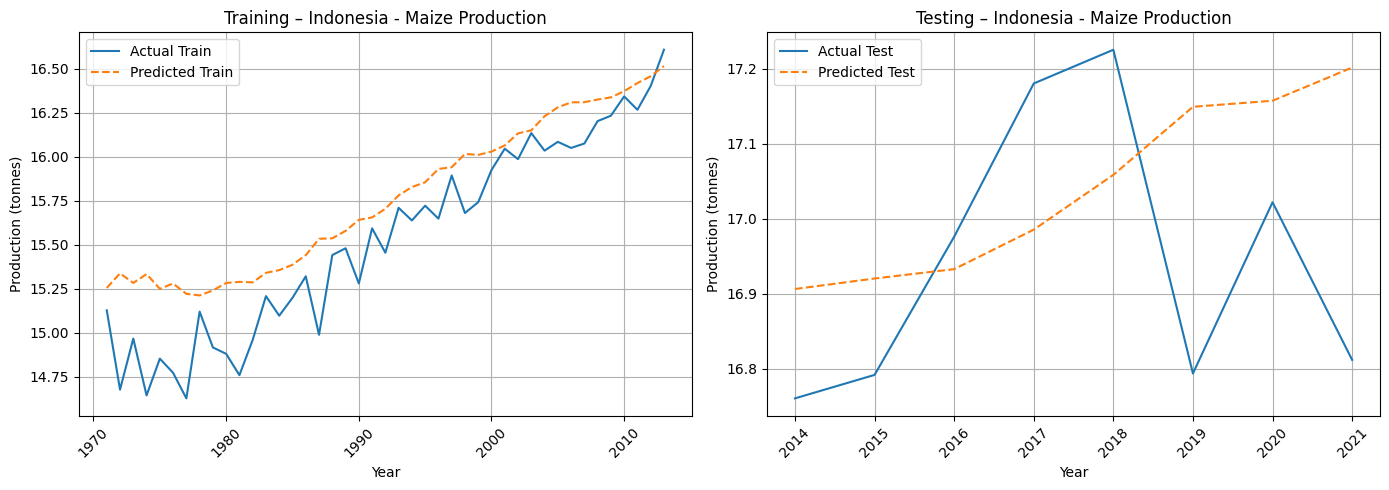

Visualizing forecast for Indonesia - Rice Production


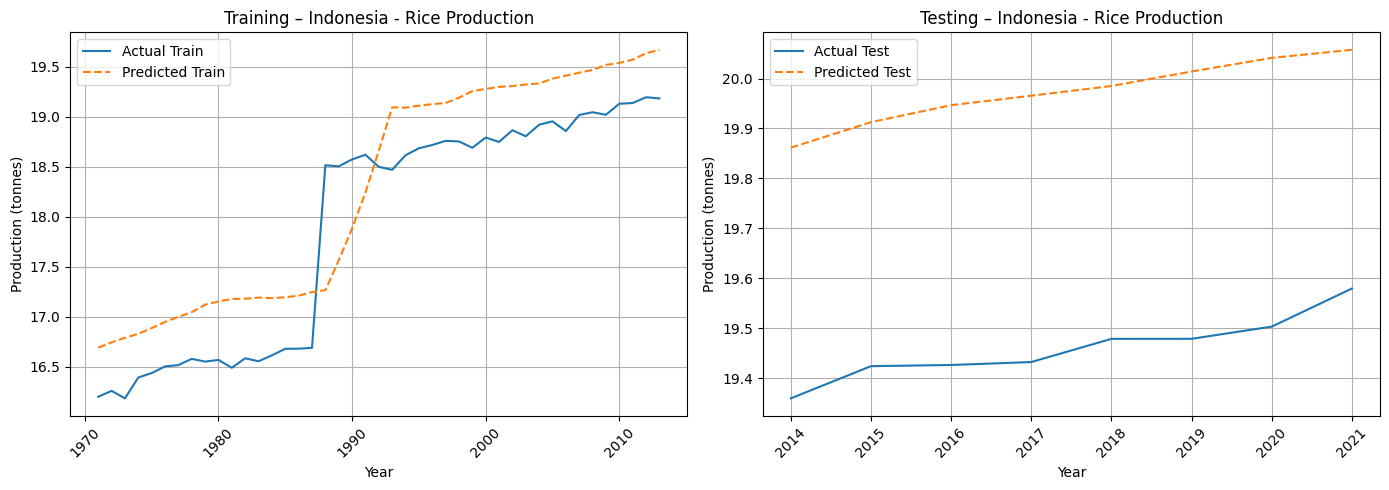

Visualizing forecast for Indonesia - Coffee green Production


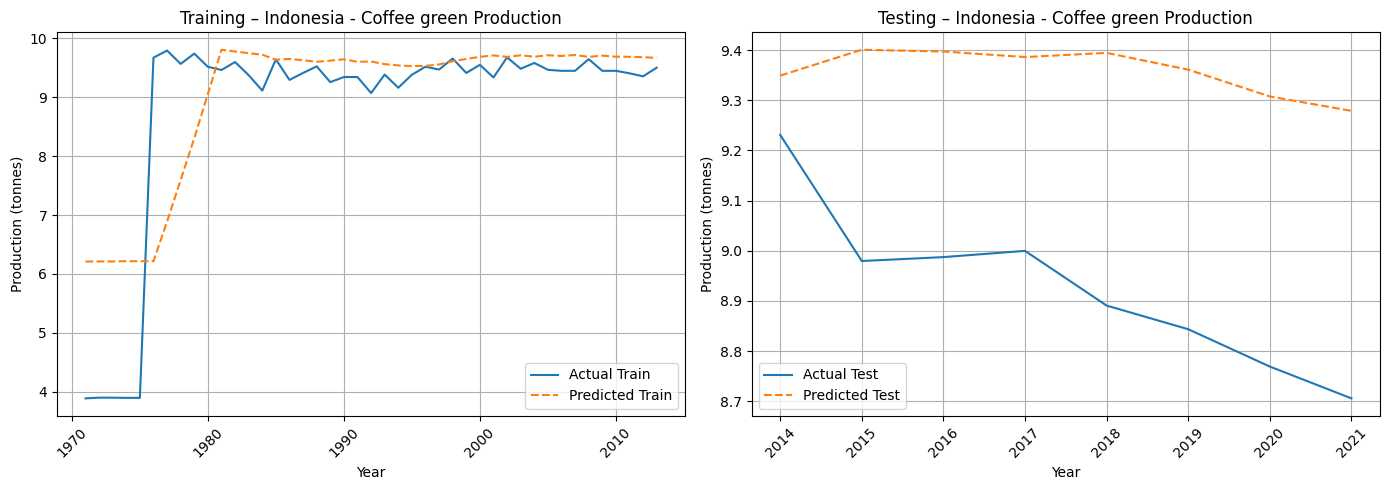

Visualizing forecast for Indonesia - Cocoa beans Production


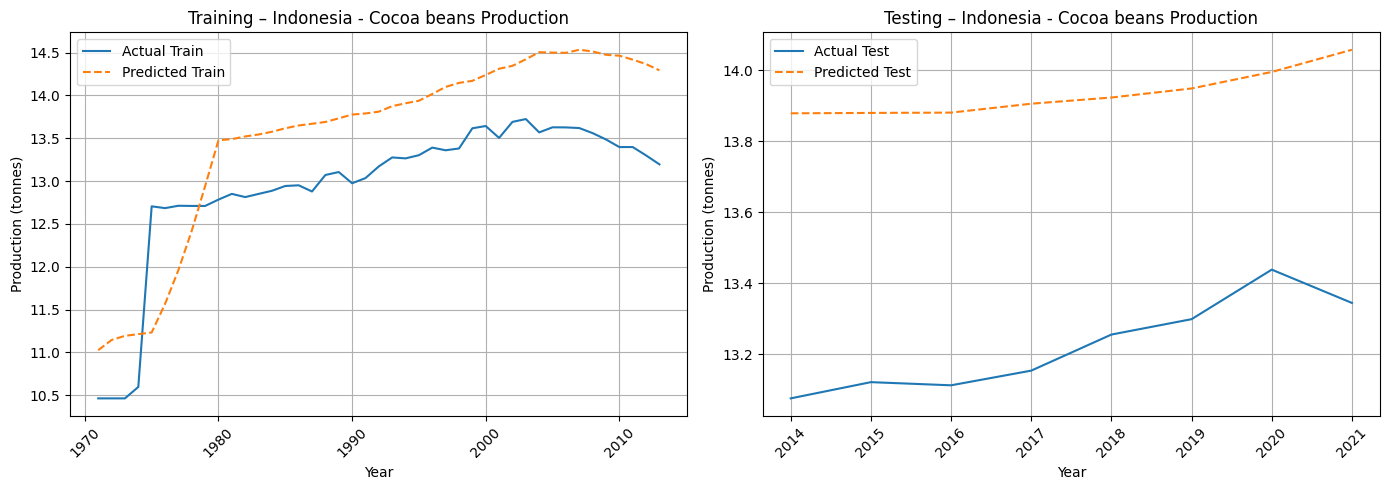

Visualizing forecast for Indonesia - Palm oil Production


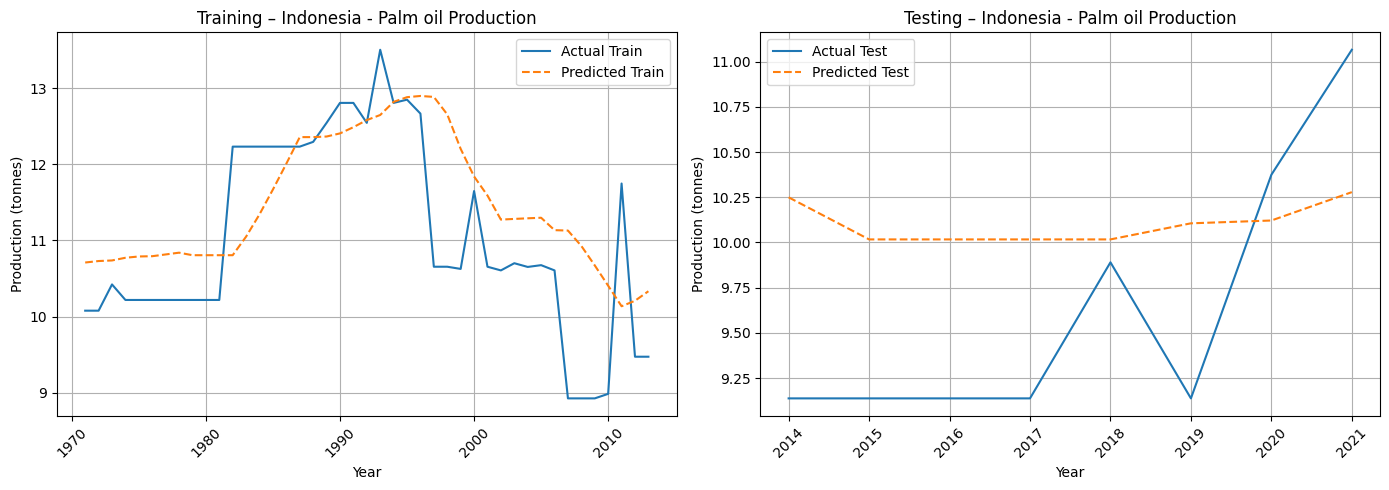

Visualizing forecast for Vietnam - Maize Production


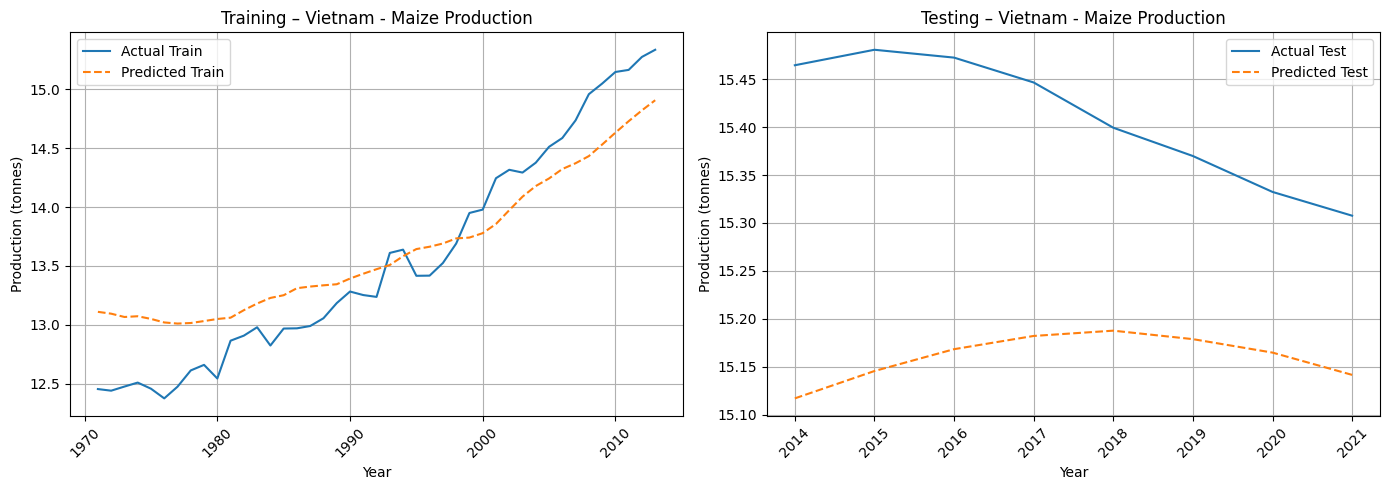

Visualizing forecast for Vietnam - Rice Production


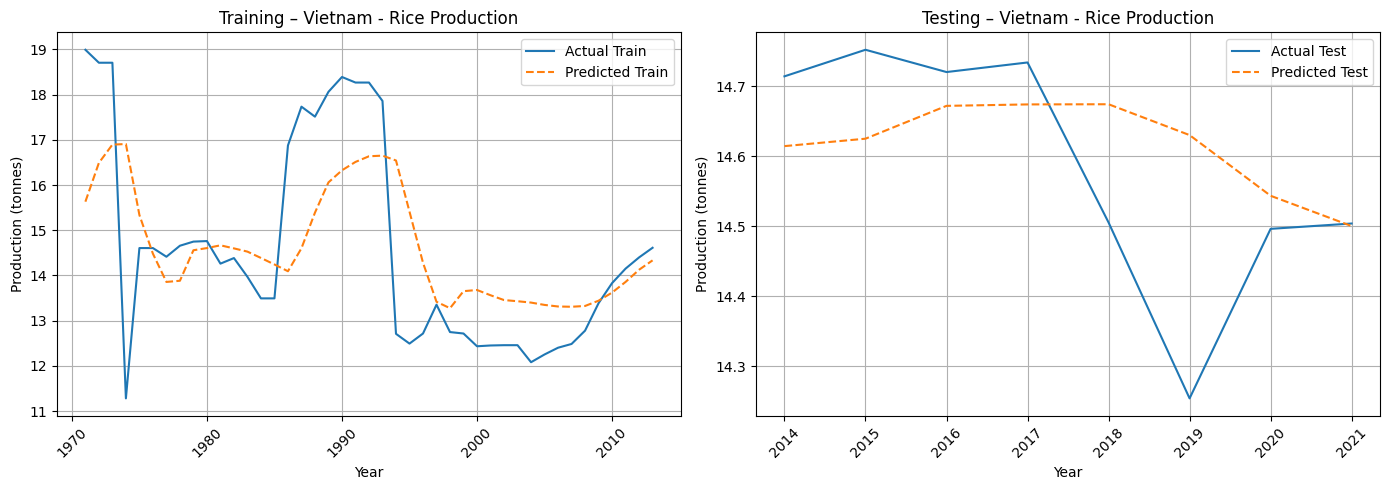

Visualizing forecast for Vietnam - Coffee green Production


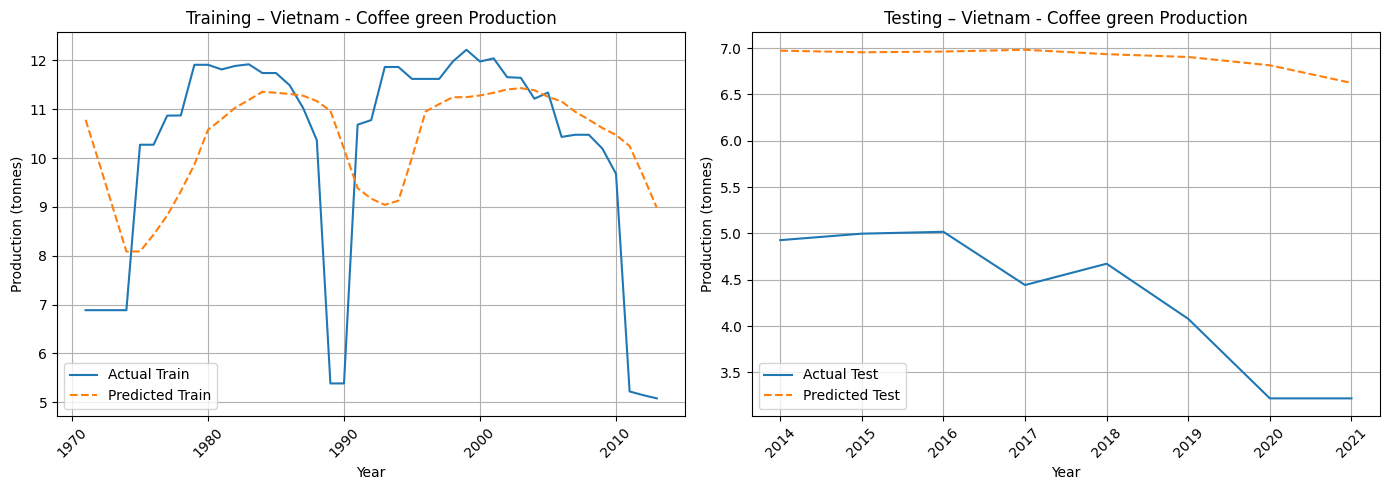

Visualizing forecast for Vietnam - Cocoa beans Production


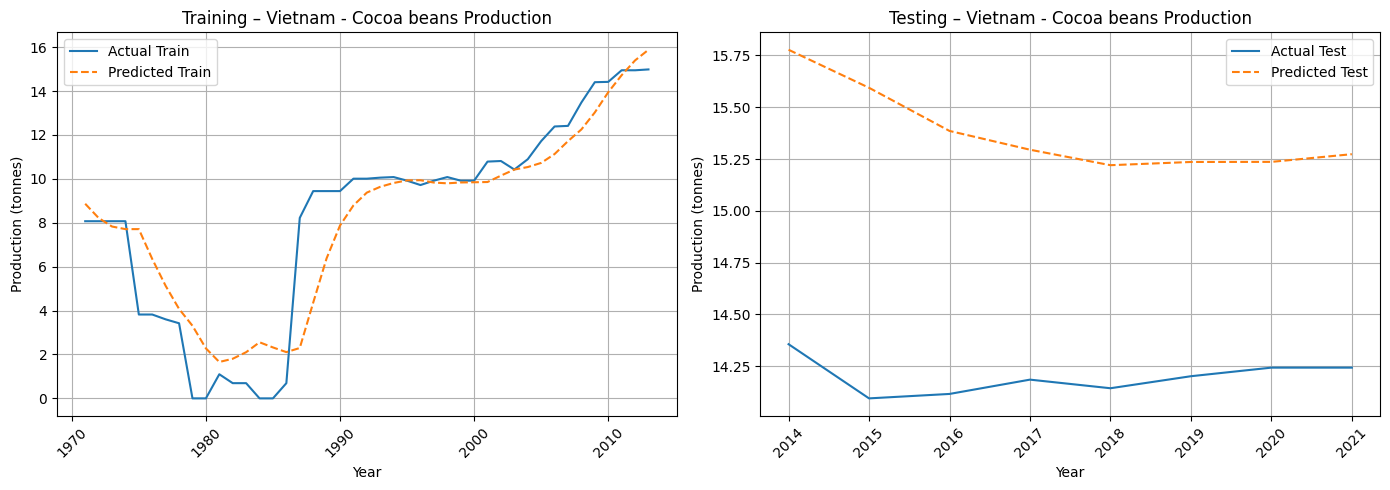

Visualizing forecast for Vietnam - Palm oil Production


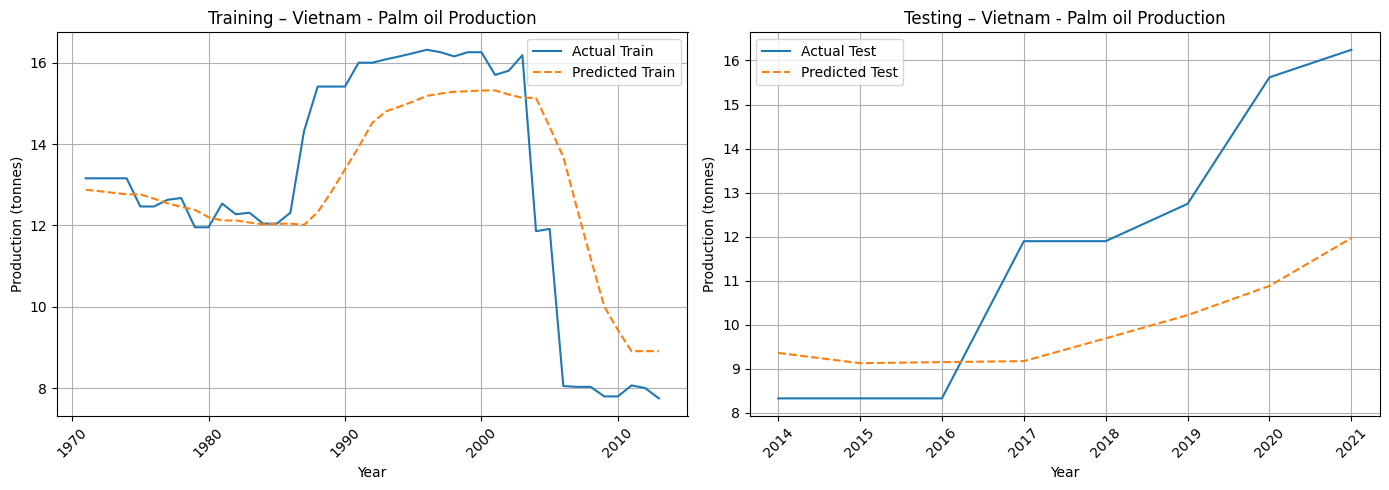

Visualizing forecast for Thailand - Maize Production


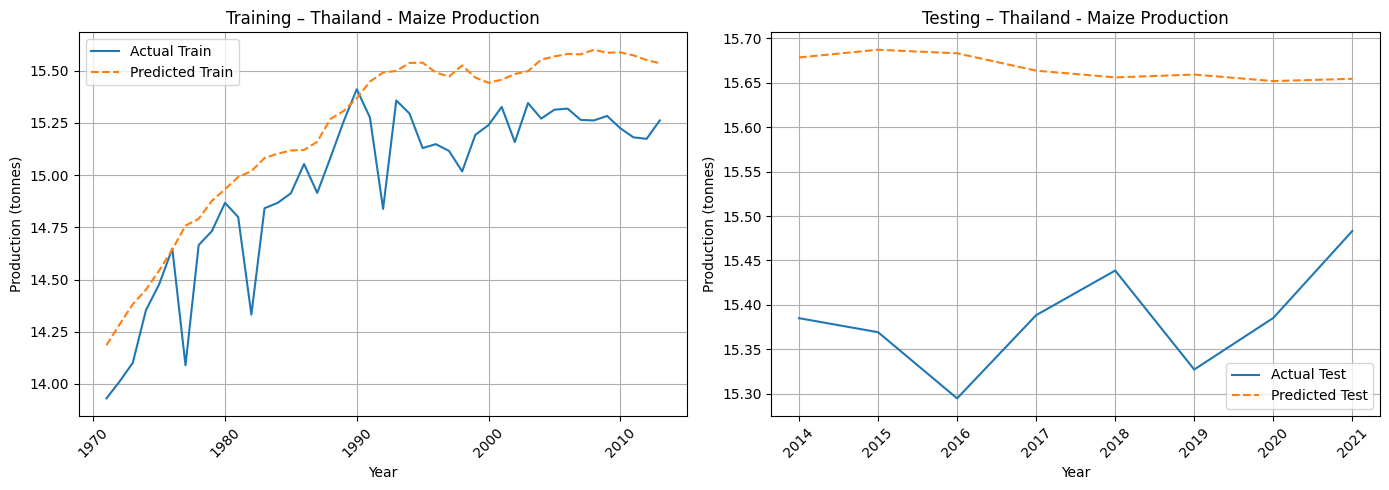

Visualizing forecast for Thailand - Rice Production


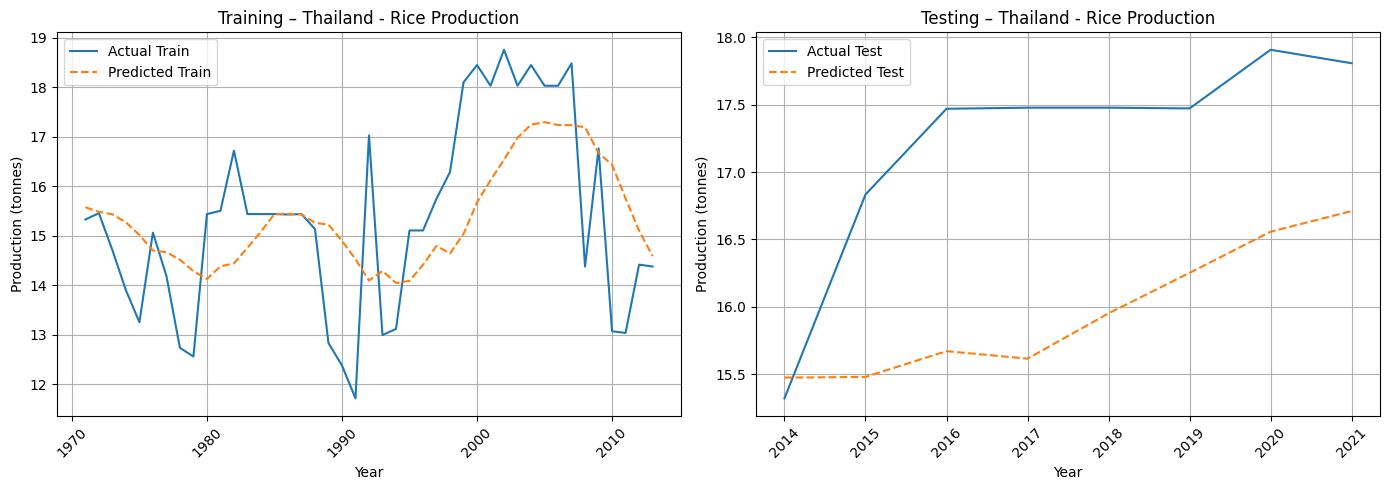

Visualizing forecast for Thailand - Coffee green Production


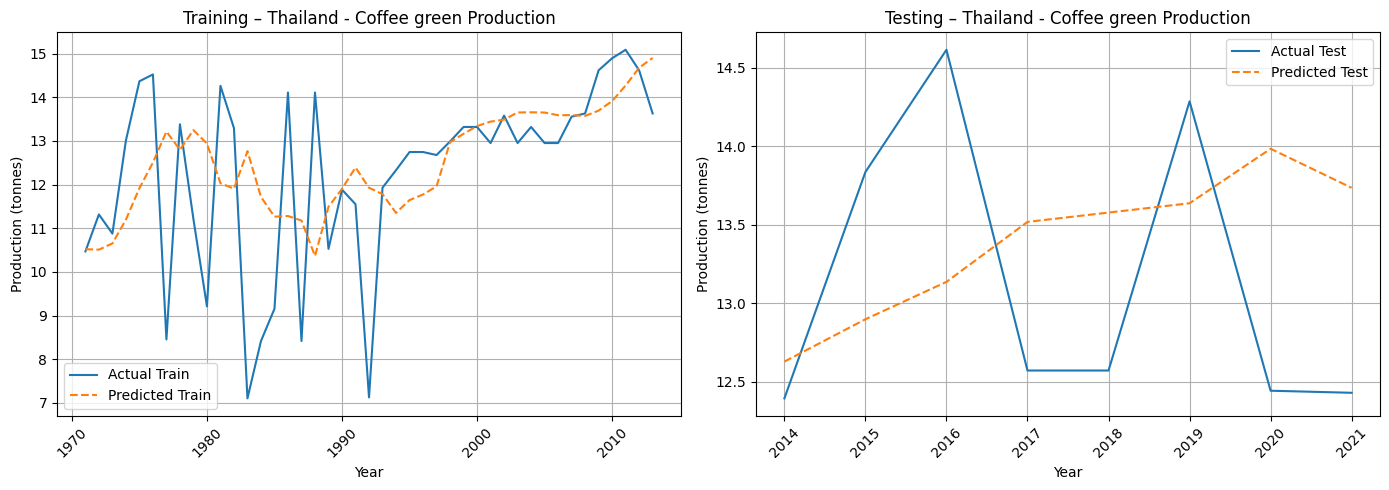

Visualizing forecast for Thailand - Cocoa beans Production


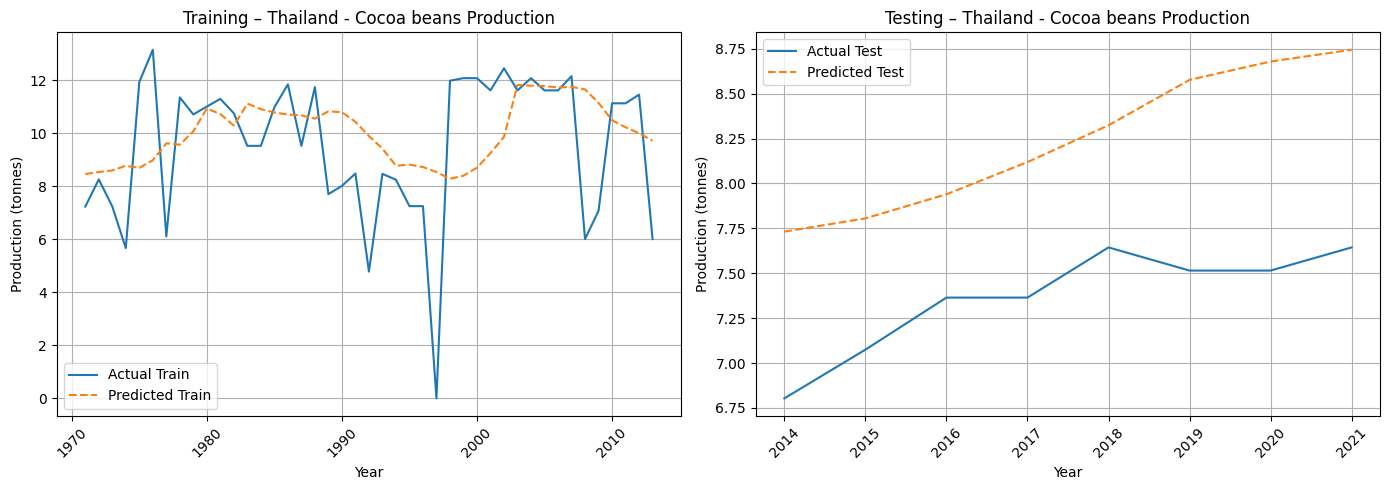

Visualizing forecast for Thailand - Palm oil Production


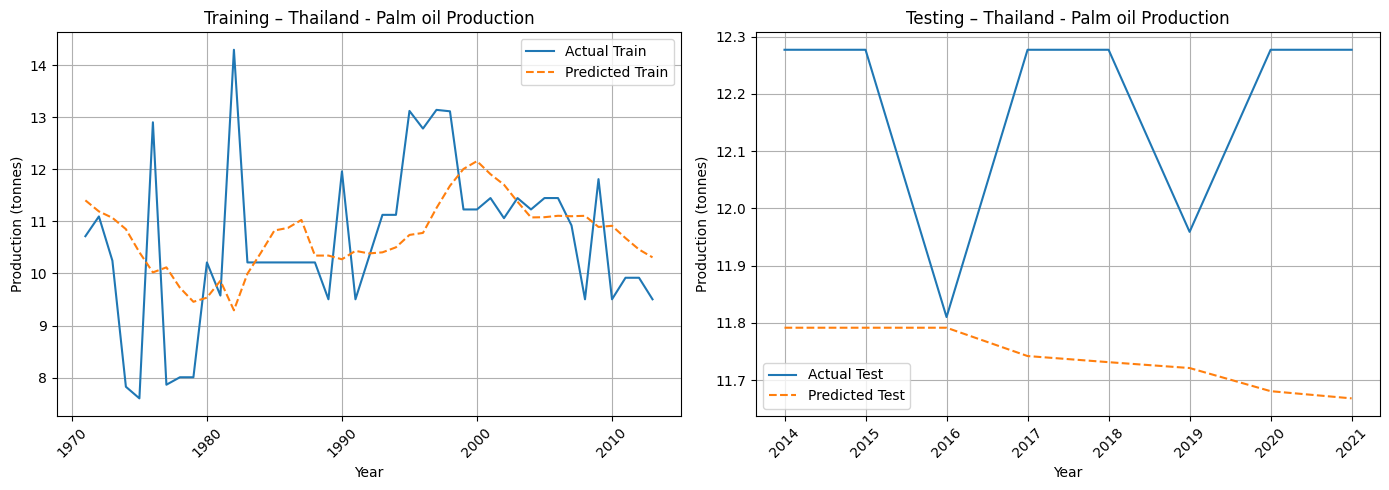

Visualizing forecast for Philippines - Maize Production


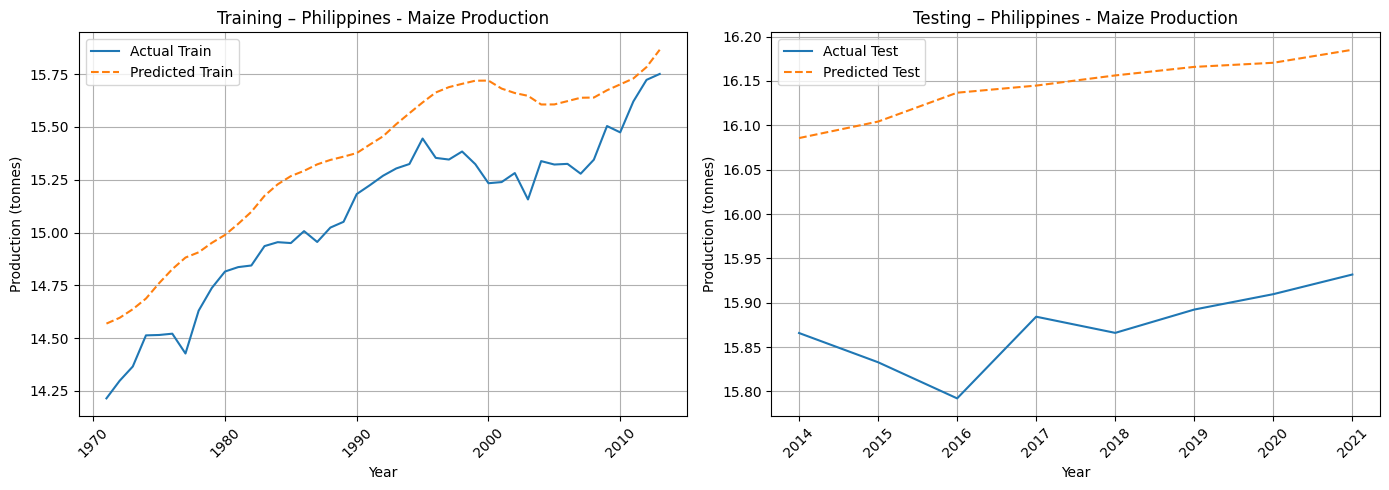

Visualizing forecast for Philippines - Rice Production


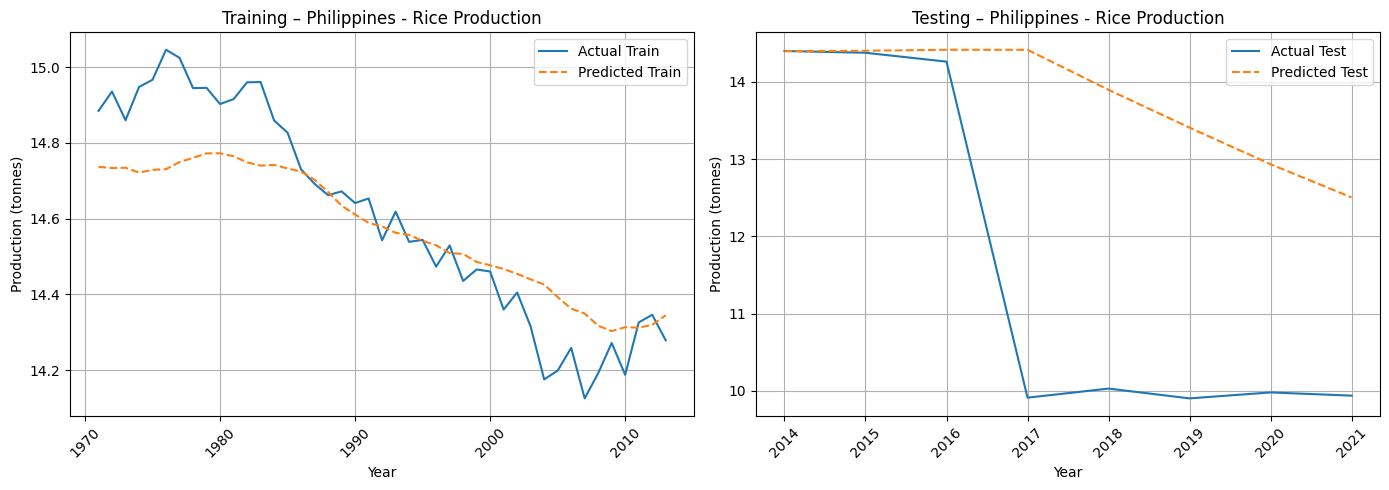

Visualizing forecast for Philippines - Coffee green Production


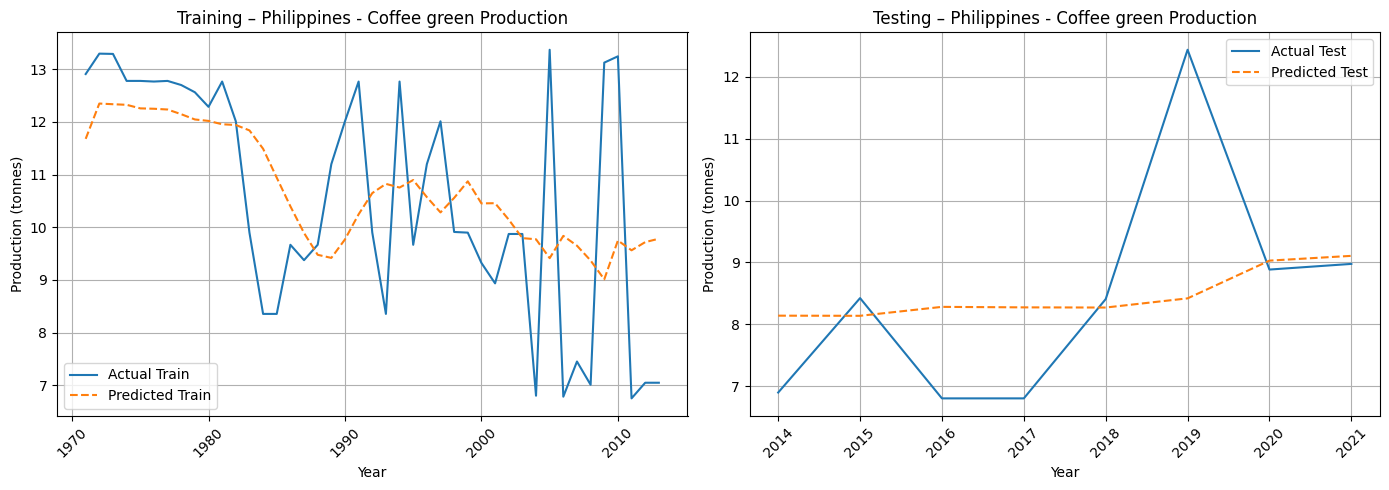

Visualizing forecast for Philippines - Cocoa beans Production


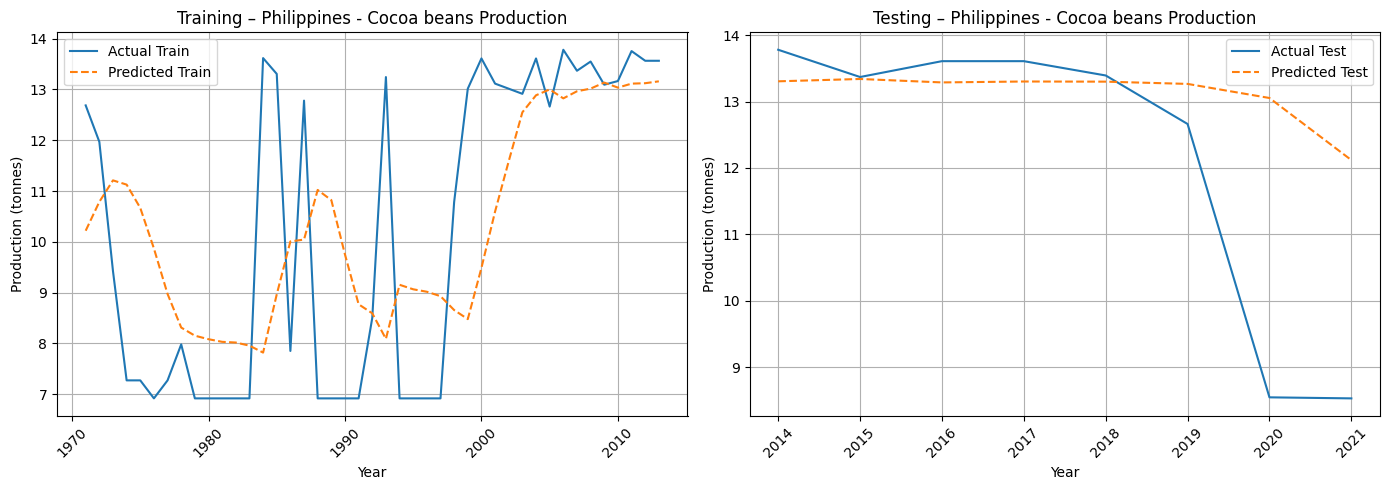

Visualizing forecast for Philippines - Palm oil Production


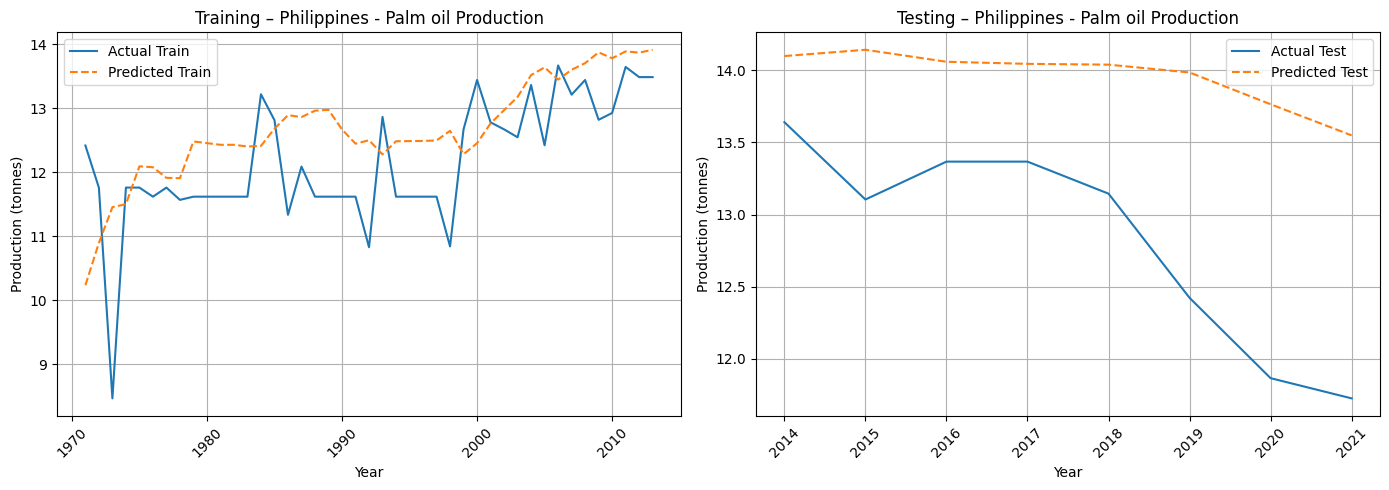

Visualizing forecast for Malaysia - Maize Production


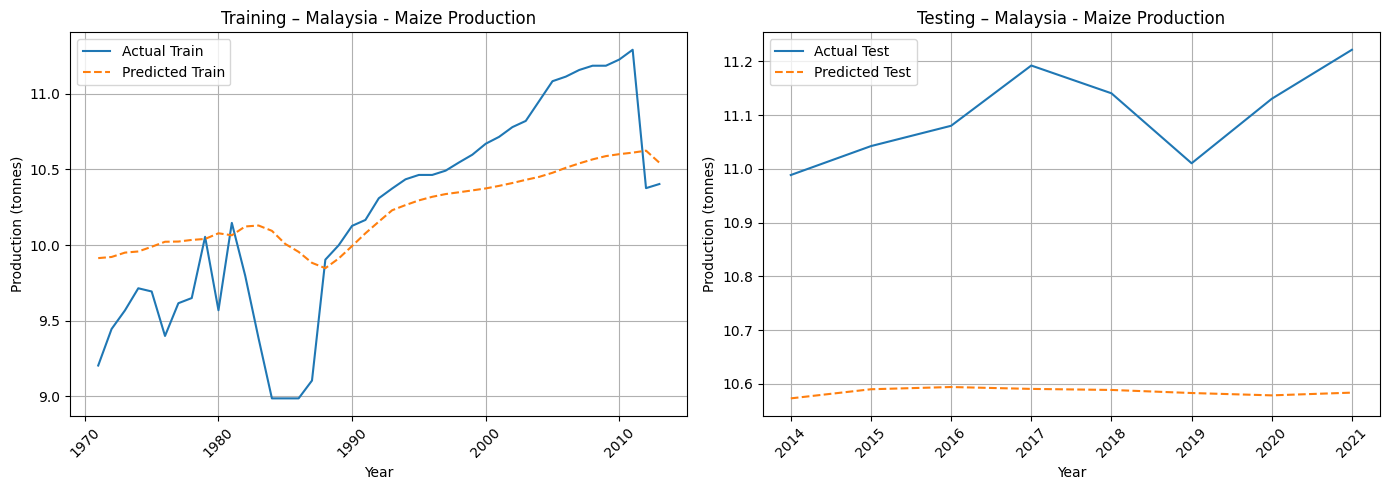

Visualizing forecast for Malaysia - Rice Production


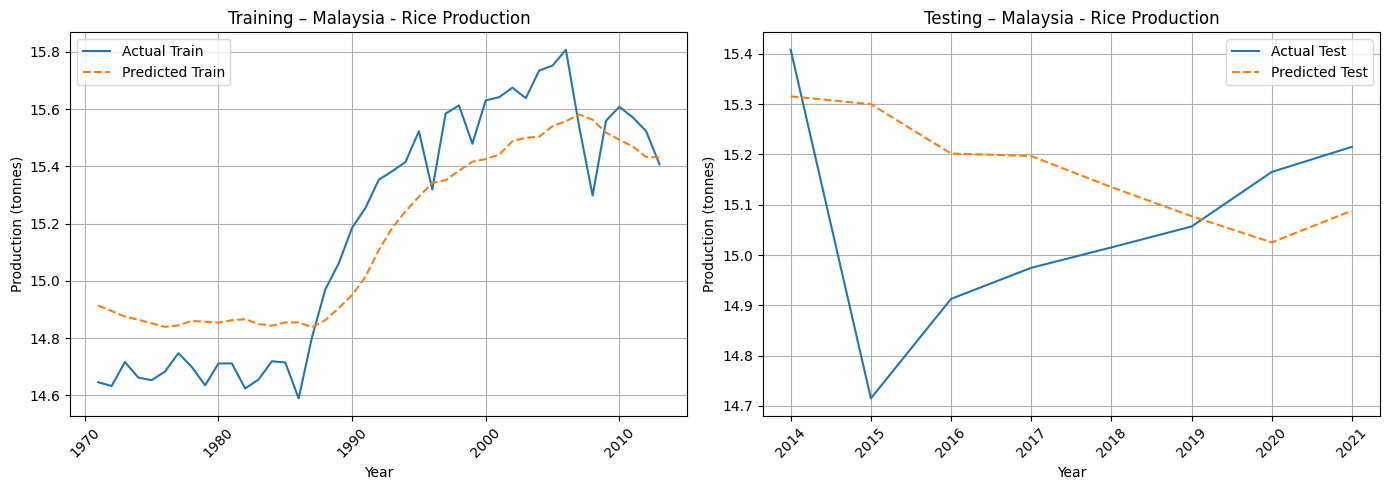

Visualizing forecast for Malaysia - Coffee green Production


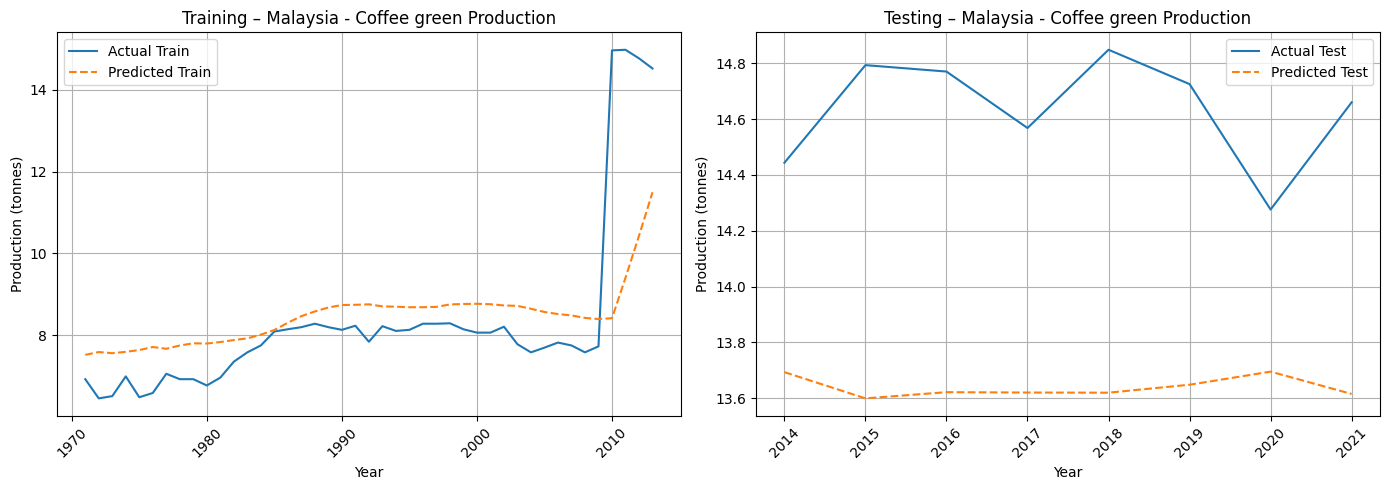

Visualizing forecast for Malaysia - Cocoa beans Production


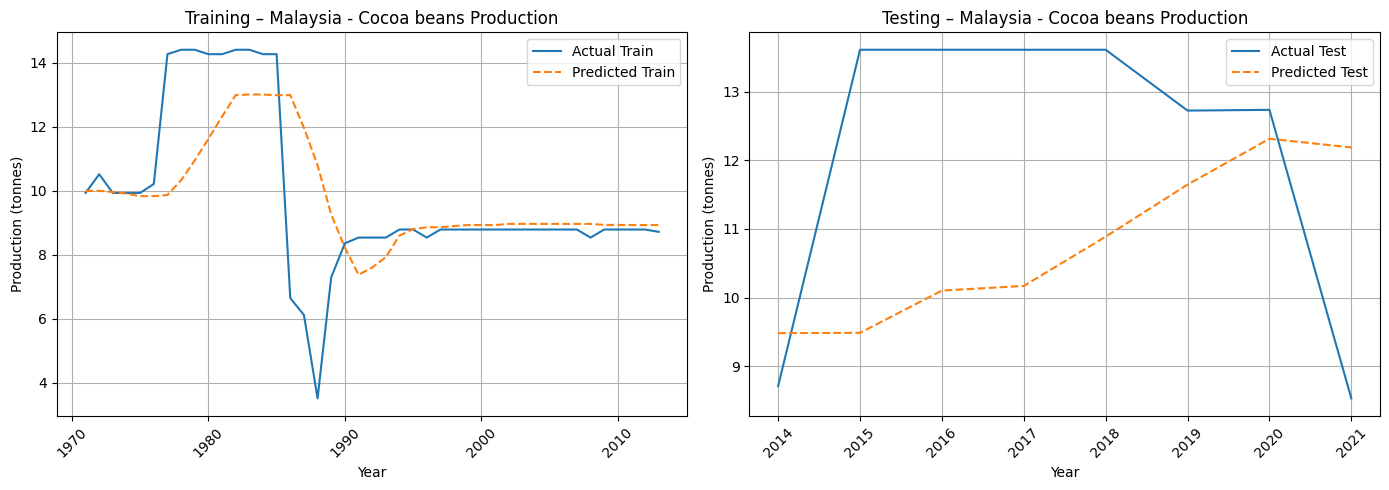

Visualizing forecast for Malaysia - Palm oil Production


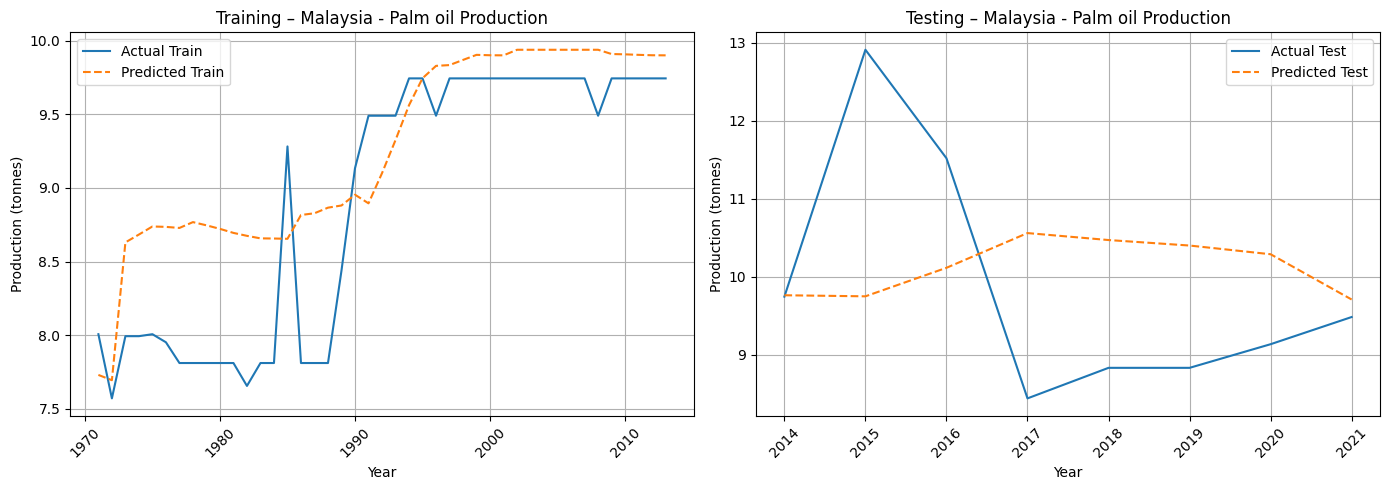

In [ ]:
scaler_key = key.split(" - ")[-1].strip()
scaler = scalers[scaler_key]

y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(data['y_test'].reshape(-1, 1))

def plot_forecast_with_years_original(key, model, data_dict, scalers, save=False):
    data = data_dict[key]
    commodity = key.split("-")[-1].strip()
    scaler = scalers[commodity]

    y_train_pred = model.predict(data['X_train'], verbose=0)
    y_test_pred = model.predict(data['X_test'], verbose=0)

    y_train_actual = scaler.inverse_transform(data['y_train'].reshape(-1, 1)).flatten()
    y_train_pred_actual = scaler.inverse_transform(y_train_pred).flatten()

    y_test_actual = scaler.inverse_transform(data['y_test'].reshape(-1, 1)).flatten()
    y_test_pred_actual = scaler.inverse_transform(y_test_pred).flatten()

    years_test = data['years_test'][:len(y_test_actual)]
    start_year = years_test[0] - len(y_train_actual)
    years_train = list(range(start_year, years_test[0]))

    plt.figure(figsize=(14, 5))

    # Training
    plt.subplot(1, 2, 1)
    plt.plot(years_train, y_train_actual, label='Actual Train')
    plt.plot(years_train, y_train_pred_actual, '--', label='Predicted Train')
    plt.title(f'Training – {key}')
    plt.xlabel('Year'); plt.ylabel('Production (tonnes)')
    plt.xticks(rotation=45); plt.legend(); plt.grid(True)

    # Testing
    plt.subplot(1, 2, 2)
    plt.plot(years_test, y_test_actual, label='Actual Test')
    plt.plot(years_test, y_test_pred_actual, '--', label='Predicted Test')
    plt.title(f'Testing – {key}')
    plt.xlabel('Year'); plt.ylabel('Production (tonnes)')
    plt.xticks(rotation=45); plt.legend(); plt.grid(True)

    plt.tight_layout()
    if save:
        safe_key = key.replace(" ", "_").replace(",", "").replace("–", "-")
        plt.savefig(f"{safe_key}.png")
    plt.show()

for key in model_results:
    print(f"Visualizing forecast for {key}")
    plot_forecast_with_years_original(
        key=key,
        model=model_results[key]['model'],
        data_dict=reshaped_data,
        scalers=scalers,
    )

### Future Prediction

Model LSTM yang telah dilatih digunakan untuk memprediksi produksi komoditas hingga tahun 2030. Prediksi dilakukan secara bertahap (recursive forecasting) dengan menggunakan output prediksi sebelumnya sebagai input baru. Skala data dikembalikan ke nilai aktual menggunakan inverse transform untuk menghasilkan estimasi produksi dalam satuan ton.


In [ ]:
forecast_results = []

look_back = 5
target_year = 2030

for key in model_results:
    model = model_results[key]['model']
    data = reshaped_data[key]
    scaler = scalers[key.split("-")[-1].strip()]
    commodity = key.split("-")[-1].strip()
    country = key.split("-")[0].strip()

    last_sequence = np.concatenate([data['y_train'], data['y_test']])[-look_back:]
    years_last_known = data['years_test'][-1]
    years_to_forecast = target_year - years_last_known

    current_sequence = last_sequence.copy()
    preds_scaled = []

    for _ in range(years_to_forecast):
        input_seq = current_sequence[-look_back:].reshape((1, look_back, 1))
        next_pred = model.predict(input_seq, verbose=0)
        preds_scaled.append(next_pred[0, 0])
        current_sequence = np.append(current_sequence, next_pred[0, 0])

    preds_actual = scaler.inverse_transform(np.array(preds_scaled).reshape(-1, 1)).flatten()

    forecast_results.append({
        'Country': country,
        'Commodity': commodity,
        'Forecast2030': preds_actual[-1],
        'FromYear': years_last_known + 1,
        'ToYear': target_year
    })

forecast_df = pd.DataFrame(forecast_results)
forecast_df.sort_values(by=['Commodity', 'Forecast2030'], ascending=[True, False])

,Country,Commodity,Forecast2030,FromYear,ToYear
8,Vietnam,Cocoa beans Production,24.375193,2022,2030
3,Indonesia,Cocoa beans Production,16.617132,2022,2030
18,Philippines,Cocoa beans Production,10.681157,2022,2030
13,Thailand,Cocoa beans Production,10.132552,2022,2030
23,Malaysia,Cocoa beans Production,9.965827,2022,2030
12,Thailand,Coffee green Production,14.207090,2022,2030
22,Malaysia,Coffee green Production,11.917822,2022,2030
17,Philippines,Coffee green Production,9.949503,2022,2030
2,Indonesia,Coffee green Production,9.729990,2022,2030
7,Vietnam,Coffee green Production,8.684875,2022,2030


**Insight:**

Produksi tertinggi tahun 2030 berdasarkan masing-masing komoditas

* Cocoa beans diproyeksikan tertinggi di Vietnam
* Coffee green diproyeksikan tertinggi di Thailand
* Maize diproyeksikan tertinggi di Indonesia
* Palm oil diproyeksikan tertinggi di Filipina
* Rice diproyeksikan tertinggi di Indonesia

Tren yang teramati dari negara ASEAN

* Indonesia unggul dalam tiga komoditas utama yaitu rice, maize, dan palm oil
* Vietnam dan Thailand menunjukkan pertumbuhan pesat pada komoditas tertentu seperti cocoa beans dan coffee green, yang menandakan potensi spesialisasi produksi dan ekspor
* Malaysia menunjukkan tren stabil pada hampir semua komoditas, namun tidak mendominasi di salah satu komoditas

#### Forecasted Production in 2030

Grafik ini membandingkan hasil prediksi produksi tahun 2030 untuk lima komoditas utama di lima negara ASEAN. Visualisasi menggunakan grafik batang kelompok (grouped bar chart) untuk memperlihatkan performa masing-masing negara dalam setiap komoditas.

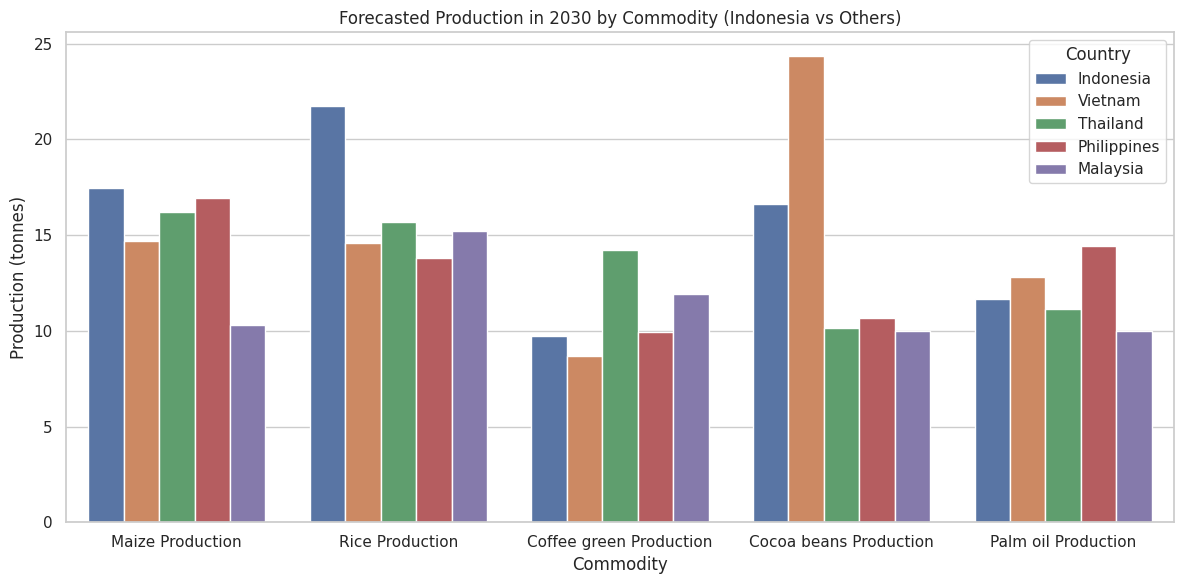

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(data=forecast_df, x='Commodity', y='Forecast2030', hue='Country')

plt.title('Forecasted Production in 2030 by Commodity (Indonesia vs Others)')
plt.ylabel('Production (tonnes)')
plt.xlabel('Commodity')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

**Insight:**

* Vietnam diproyeksikan mendominasi Cocoa beans Production di tahun 2030, jauh melampaui negara lain
* Indonesia menunjukkan potensi tertinggi dalam Rice dan Maize Production
* Performa negara berbeda-beda tergantung pada komoditas, mencerminkan spesialisasi dan fokus agrikultur masing-masing
* Informasi ini dapat menjadi dasar untuk strategi ketahanan pangan dan perdagangan komoditas di kawasan ASEAN

#### Forecast Comparison (Until 2030)

Melakukan prediksi produksi komoditas hingga tahun 2030 untuk setiap kombinasi negara dan komoditas yang tersedia. Model LSTM yang telah dilatih digunakan untuk menghasilkan prediksi berdasarkan 5 data terakhir dari gabungan data pelatihan dan pengujian. Output prediksi disimpan dalam struktur forecast_by_commodity dan divisualisasikan dalam bentuk grafik per komoditas untuk membandingkan tren antar negara.

In [ ]:
def forecast_future(model, last_sequence, n_years, scaler, look_back=5):
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(n_years):
        input_seq = current_sequence[-look_back:].reshape((1, look_back, 1))
        next_pred = model.predict(input_seq, verbose=0)
        predictions.append(next_pred[0, 0])
        current_sequence = np.append(current_sequence, next_pred[0, 0])

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
    return predictions

In [ ]:
forecast_by_commodity = {}

for key in model_results:
    model = model_results[key]['model']
    data = reshaped_data[key]
    scaler = scalers[key.split("-")[-1].strip()]
    commodity = key.split("-")[-1].strip()
    country = key.split("-")[0].strip()

    last_sequence = np.concatenate([data['y_train'], data['y_test']])[-5:]
    years_last_known = data['years_test'][-1]
    years_to_forecast = 2030 - years_last_known
    forecast_years = list(range(years_last_known + 1, 2031))

    preds = forecast_future(model, last_sequence, years_to_forecast, scaler)

    if commodity not in forecast_by_commodity:
        forecast_by_commodity[commodity] = {}

    forecast_by_commodity[commodity][country] = {
        'years': forecast_years,
        'predictions': preds
    }

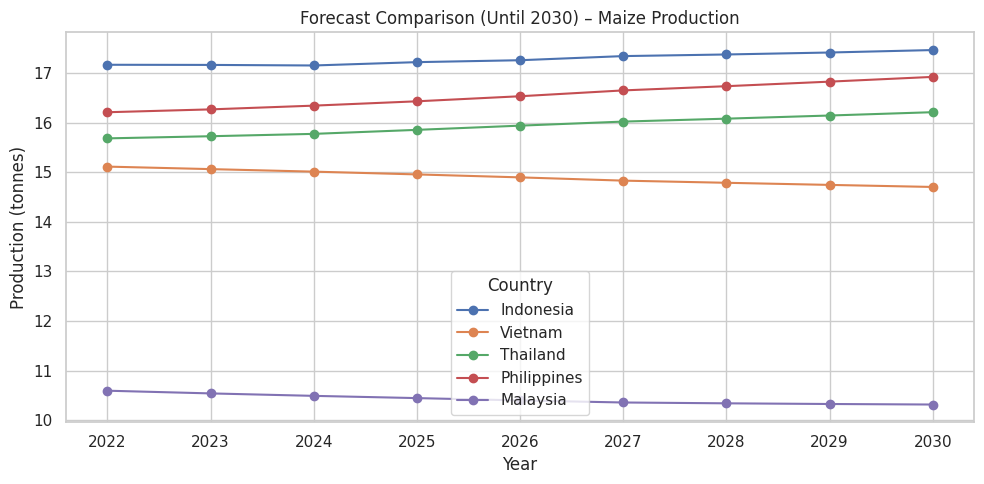

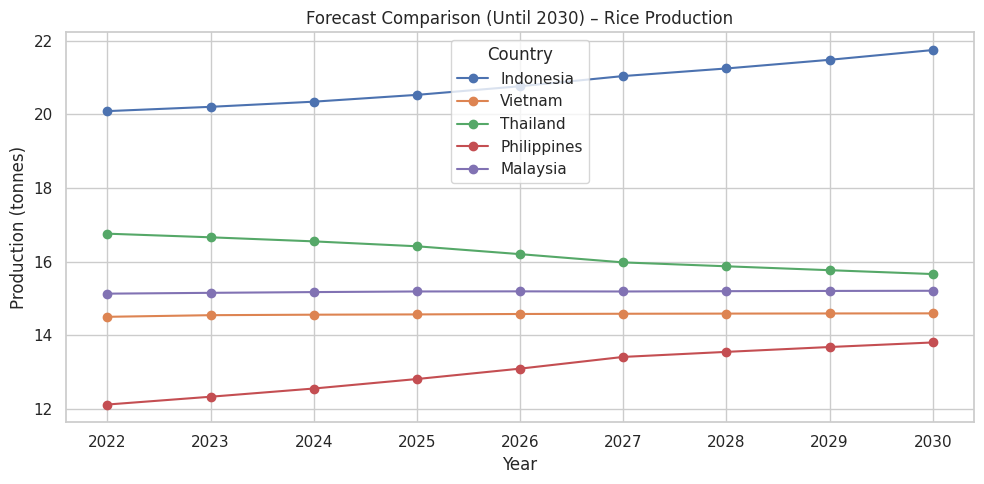

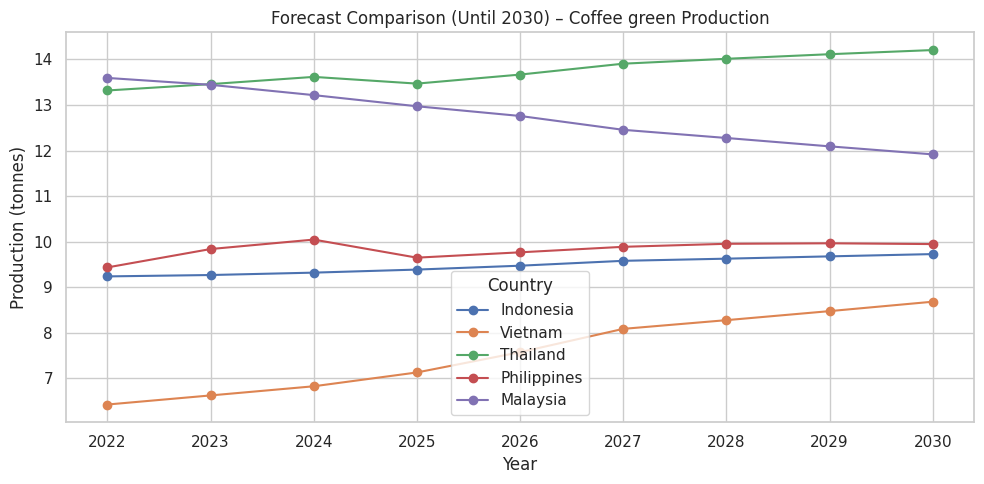

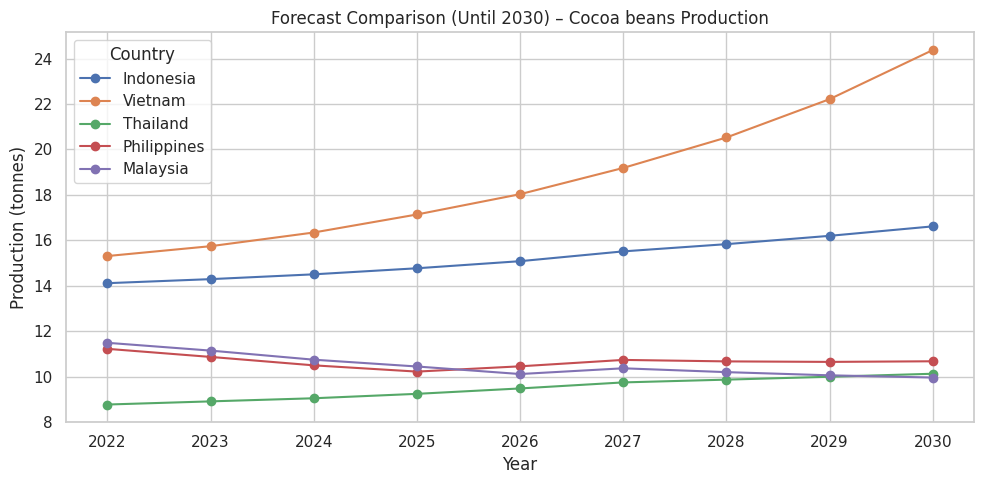

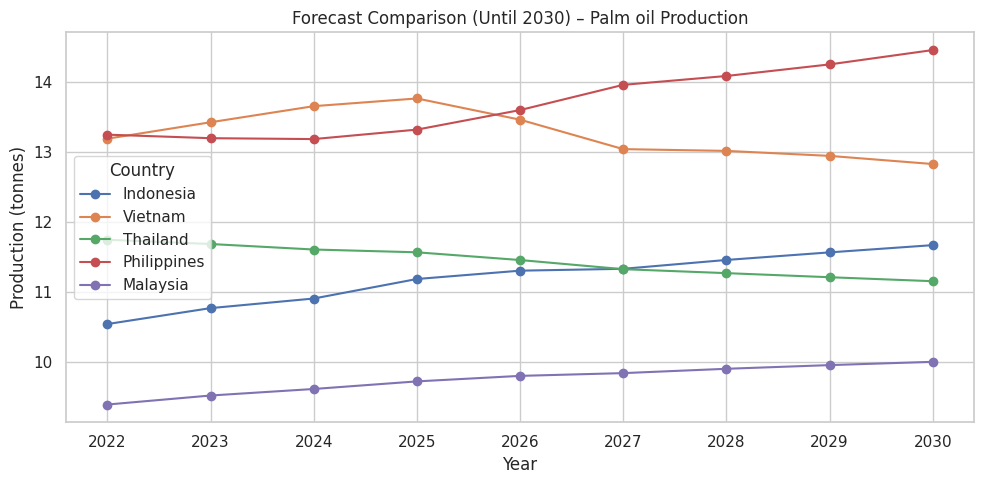

In [ ]:
for commodity, countries_data in forecast_by_commodity.items():
    plt.figure(figsize=(10, 5))
    for country, values in countries_data.items():
        plt.plot(values['years'], values['predictions'], marker='o', label=country)

    plt.title(f'Forecast Comparison (Until 2030) – {commodity}')
    plt.xlabel('Year'); plt.ylabel('Production (tonnes)')
    plt.grid(True); plt.legend(title='Country')
    plt.tight_layout()
    plt.show()

**Insight:**

Model LSTM yang telah dilatih digunakan untuk memprediksi produksi komoditas hingga tahun 2030. Prediksi dilakukan secara bertahap (recursive forecasting) dengan menggunakan output prediksi sebelumnya sebagai input baru. Skala data dikembalikan ke nilai aktual menggunakan inverse transform untuk menghasilkan estimasi produksi dalam satuan ton.

- Prediksi produksi hingga tahun 2030 berhasil dilakukan untuk 25 kombinasi negara dan komoditas
- Komoditas Cocoa beans Production di Vietnam diproyeksikan menjadi yang tertinggi pada tahun 2030
- Produksi Maize di Indonesia dan Rice di Indonesia juga menunjukkan angka proyeksi yang tinggi
- Negara-negara ASEAN menunjukkan variasi produksi berdasarkan komoditas unggulan masing-masing
- Hasil ini dapat digunakan untuk perencanaan strategis sektor pertanian di kawasan ASEAN menjelang tahun 2030


## Keterkaitan Hasil Evaluasi dengan Business Understanding

### Apakah model menjawab setiap problem statement?

**Masalah 1:**
*Tren historis produksi pertanian di negara-negara ASEAN sangat fluktuatif. Tanpa peramalan yang akurat, pemerintah dan pemangku kepentingan di sektor pertanian kesulitan dalam merumuskan strategi pangan dan perdagangan jangka panjang.*

* Terjawab.
  Model LSTM univariat yang dikembangkan berhasil mempelajari pola musiman dan non-linear dalam data produksi tahunan dari lima negara ASEAN untuk lima komoditas utama. Hasil evaluasi menggunakan RMSE menunjukkan bahwa model mampu memberikan prediksi yang cukup akurat untuk beberapa negara dan komoditas, seperti beras di Vietnam (RMSE = 0.159) dan jagung di Indonesia (RMSE = 0.224).

**Masalah 2:**
*Belum tersedia standar perbandingan proyeksi produksi yang membandingkan posisi Indonesia dengan negara produsen utama ASEAN lainnya.*

* Terjawab.
  Proyek ini membangun total 25 model prediksi untuk setiap kombinasi negara dan komoditas, yang memungkinkan dilakukan perbandingan lintas negara secara kuantitatif menggunakan hasil prediksi produksi tahun 2030 dan nilai evaluasi RMSE/MSE. Hal ini memberikan wawasan mengenai posisi kompetitif Indonesia dalam produksi beras, jagung, dan komoditas lainnya.

**Masalah 3:**
*Teknik peramalan tradisional (misalnya statistik dasar atau regresi linier) sering kali gagal menangkap pola musiman dan non-linier dalam data deret waktu produksi pertanian jangka panjang.*

* Terjawab.
  LSTM sebagai model berbasis Recurrent Neural Network mampu mengatasi keterbatasan teknik tradisional. Ini dibuktikan dengan performa model pada kombinasi tertentu seperti kopi hijau Thailand (RMSE = 1.09) dan minyak sawit Filipina (RMSE = 1.24), di mana model masih dapat mengikuti tren meski data historis cukup fluktuatif.

### Apakah model berhasil mencapai goals?

**Tujuan 1:**
Model LSTM berhasil dibangun dan dilatih dengan data historis dari tahun 1961 hingga 2021, dan digunakan untuk memprediksi tren produksi lima komoditas di lima negara ASEAN hingga tahun 2030.

**Tujuan 2:**
Perbandingan antar negara dan komoditas berhasil dilakukan melalui hasil evaluasi numerik (RMSE, MSE) serta prediksi 2030 yang disusun dalam tabel. Ini memungkinkan analisis daya saing antar negara seperti keunggulan Indonesia dalam produksi beras dan jagung, serta dominasi Vietnam dalam kakao.

**Tujuan 3:**
Model LSTM terbukti mampu menangkap pola musiman dan non-linier dalam data deret waktu pertanian. Hal ini menjadikan model ini lebih unggul dibanding model statistik konvensional, terutama pada data dengan fluktuasi tinggi seperti produksi kopi dan minyak sawit.

### Apakah solusi yang direncanakan berdampak?

**Solusi 1:**
Model LSTM univariat menunjukkan efektivitasnya dalam memprediksi tren berdasarkan data tahunan. Model memberikan hasil yang baik pada pola konsisten (misalnya beras Indonesia) dan mampu beradaptasi dengan pola fluktuatif (misalnya kakao Vietnam).

**Solusi 2:**
Visualisasi hasil prediksi serta evaluasi numerik berhasil memberikan gambaran yang jelas tentang posisi Indonesia dibanding negara ASEAN lain. Misalnya, Indonesia diproyeksikan memimpin produksi beras pada 2030, sedangkan Vietnam unggul dalam kakao.

### Kesimpulan

Evaluasi menunjukkan bahwa model LSTM univariat yang dibangun efektif dalam memprediksi tren produksi pangan di ASEAN. Seluruh pernyataan masalah berhasil dijawab, tujuan tercapai, dan solusi yang diusulkan memberikan dampak nyata. Proyek ini berpotensi menjadi alat bantu penting bagi perumusan kebijakan pangan dan perencanaan produksi jangka panjang di kawasan Asia Tenggara.